In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn
import impyute

In [3]:
#INPUT DATA

data = pd.read_csv('chronic_kidney_disease.csv') 
print(data.head())


    age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   white blood cell count  red blood cell count  hypertension  \
0                    7800                   5.2    

In [4]:
print(data.shape) #Shape of the data frame

data.describe()#statistical data

(400, 25)


,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


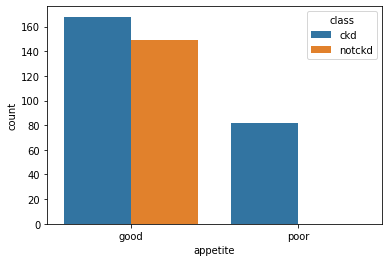

In [5]:

data=data.replace('\t','',regex=True) #remove \t from data
data=data.replace('\n','',regex=True) #remove \t from data
sns.countplot(data["appetite"],hue=data["class"])

In [6]:
data=data.replace('\t','',regex=True) #remove \t from data
data=data.replace('\n','',regex=True) #remove \t from data

Data=data.replace('notckd',0,regex=True) #replace notckd with 0
Data=Data.replace('ckd',1,regex=True)    #replace ckd with 1

Data=Data.replace('abnormal',1,regex=True)    #replace abnormal with 1
Data=Data.replace('normal',0,regex=True)     #replace normal with 0

Data=Data.replace('notpresent',0,regex=True) #replace notpresent with 0
Data=Data.replace('present',1,regex=True)    #replace present with 1

Data=Data.replace('yes',1,regex=True)    #replace yes with 1
Data=Data.replace('no',0,regex=True)     #replace no with 0

Data=Data.replace('good',1,regex=True)    #replace good with 1
Data=Data.replace('poor',0,regex=True)     #replace poor with 0

print(Data.head())

    age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0              NaN   
1   7.0            50.0             1.020      4.0    0.0              NaN   
2  62.0            80.0             1.010      2.0    3.0              0.0   
3  48.0            70.0             1.005      4.0    0.0              0.0   
4  51.0            80.0             1.010      2.0    0.0              0.0   

   pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0       0.0              0.0       0.0                 121.0  ...   
1       0.0              0.0       0.0                   NaN  ...   
2       0.0              0.0       0.0                 423.0  ...   
3       1.0              1.0       0.0                 117.0  ...   
4       0.0              0.0       0.0                 106.0  ...   

   white blood cell count  red blood cell count  hypertension  \
0                    7800                   5.2    

In [7]:
Data.isna().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
packed cell volume          70
dtype: int64

array([1, 0], dtype=int64)

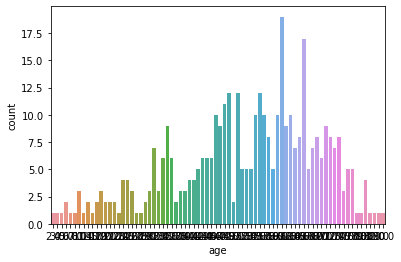

In [8]:
#Age distribution 
sns.countplot(data["age"])

Data["class"].unique()

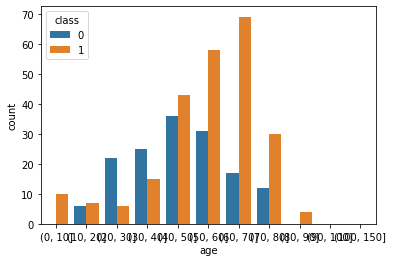

In [9]:
AgeGroup=pd.cut(Data["age"],[0,10,20,30,40,50,60,70,80,90,100,150])
sns.countplot(AgeGroup,hue=Data["class"])

# >From the output, it clearly shows that the data about 0 to 10 AND 80 to 90  ages are 100% about positive ckd
# > from the graph it shows that NONCKD has a good distribution and CKD has a bias towards older people

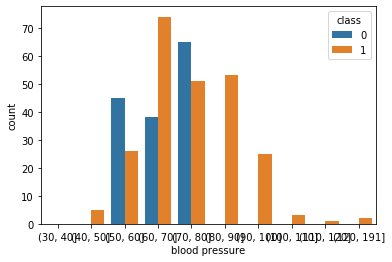

In [10]:
bloodPressureGroup=pd.cut(Data["blood pressure"],[30,40,50,60,70,80,90,100,110,120,191])
sns.countplot(bloodPressureGroup,hue=Data["class"])

#This is a plot of the blood presure and it clearly shows that when the BP is over 80 everyone gets CKD in this data set,
#but in reality there could be other decieses as well which increses the BP level
#and BP less than 50 also have CKD but usualy nonCKD people stays between BP from 50 to 80 but there are CKD people 
#in that range as well


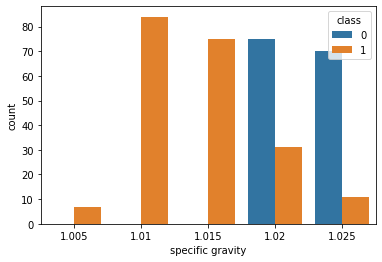

In [11]:
sns.countplot(Data["specific gravity"],hue=Data["class"])
#when consider the specific gravity it shows thats its clear if the SG is lower than 1.02 then thatperson has CKD 
# and if the SG is between 1.02 to 1.025 are the normal range but there are people who has CKD in that range as well but 
# it reduced with the specific gravity 

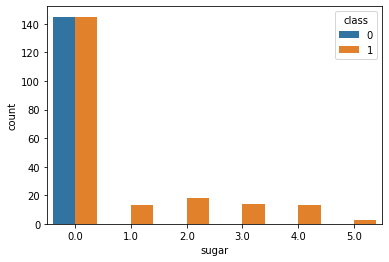

In [12]:
sns.countplot(Data["sugar"],hue=Data["class"])


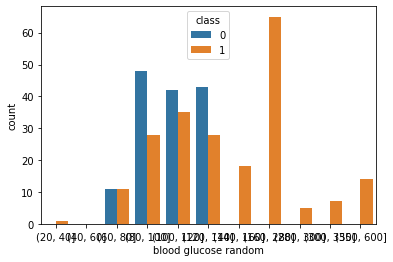

In [13]:
BoodGucoseRandomGroup=pd.cut(Data["blood glucose random"],[20,40,60,80,100,120,140,160,280,300,350,600])
sns.countplot(BoodGucoseRandomGroup,hue=Data["class"])

# the glucose level of the body should be there between 60 and 140 to be a nonCKD bu there are about 30% to 40% who has CKD
# and still maintain the glucose level. 
# but if the glucose level is above 140 its clear that person has CKD

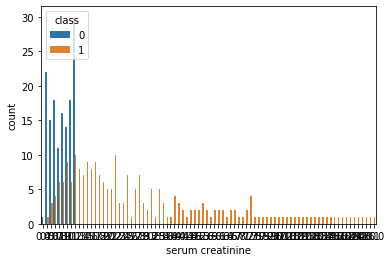

In [14]:
sns.countplot(Data["serum creatinine"],hue=Data["class"])

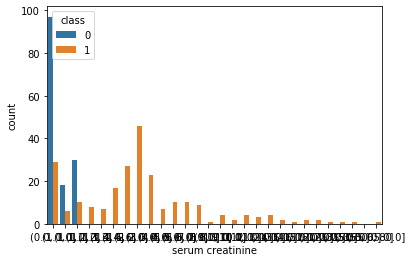

In [241]:
SerumCreatinineGroup=pd.cut(Data["serum creatinine"],[0,1,1.1,1.2,1.3,1.4,1.6,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,25,35,50,65,80])
sns.countplot(SerumCreatinineGroup,hue=Data["class"])

#This plot and the above plot clearly shows that CS should be less than 1.2 to be  a non CKD but then again there are people 
# who has CKD with less than 1.2 SC

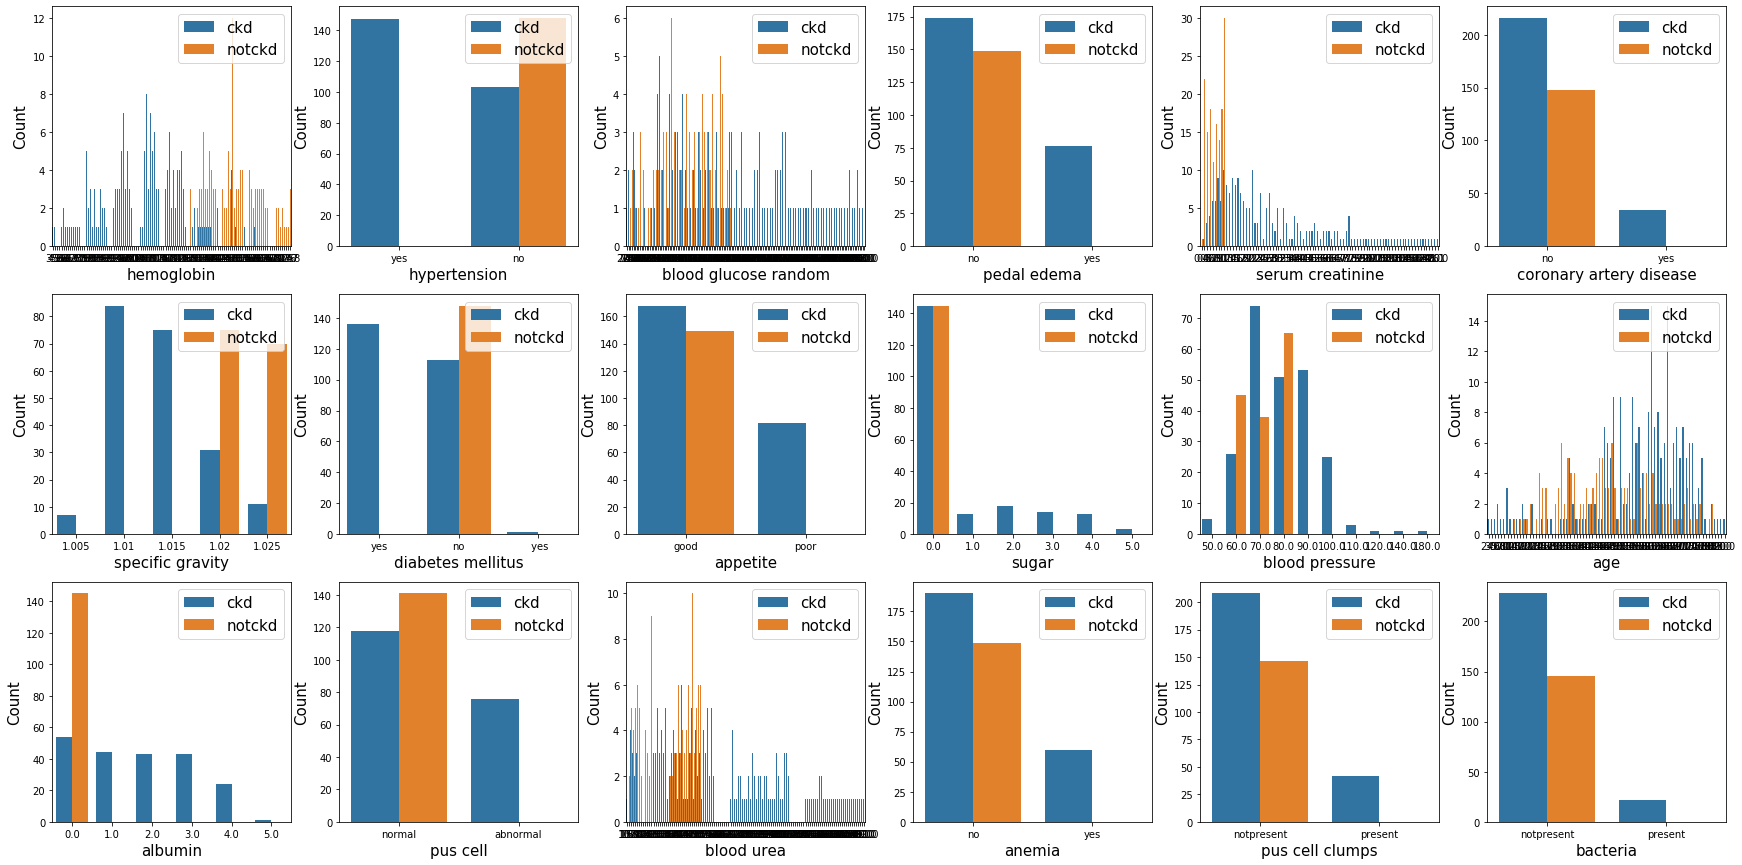

In [111]:
# Class Distribution

t=['bacteria', 'age', 'coronary artery disease', 'pus cell clumps',
       'blood pressure', 'serum creatinine', 'anemia', 'sugar', 'pedal edema',
       'blood urea', 'appetite', 'blood glucose random', 'pus cell',
       'diabetes mellitus', 'hypertension', 'albumin', 'specific gravity',
       'hemoglobin']
cols=t[::-1]
#make the subplot size
n_cols=6
n_rows=3
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
for c in range (n_cols):
    for r in range (n_rows):
        i=c*n_rows + r #index to subplot
        ax = axs[r][c]
        sns.countplot(data[cols[i]],hue=data["class"],ax=ax)
        ax.legend(loc="upper right",fontsize=15)
        ax.set_xlabel(cols[i],fontsize=15);
        ax.set_ylabel('Count',fontsize=15);

In [17]:
data.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [18]:
subdata = Data.loc[:,["class","serum creatinine","blood glucose random","sugar","specific gravity","blood pressure","age"]]
subData=subdata.dropna(subset=["class","serum creatinine","blood glucose random","sugar","specific gravity","blood pressure","age"])


In [19]:
# Training model

def models(X_train,Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0,solver='lbfgs')
    log.fit(X_train,Y_train)
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",gamma='auto',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier( criterion="entropy" ,random_state=0)
    tree.fit(X_train,Y_train)
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    #Use XGBClassifier
    import xgboost as xgb
    modelx=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
    modelx.fit(X_train,Y_train)
    
    #Use ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    ExtraTree=ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=8)
    ExtraTree.fit(X_train,Y_train)
    
    #use AdaBoostClassifier
    from sklearn.ensemble import AdaBoostClassifier
    AdaBoost = AdaBoostClassifier(n_estimators=100)
    AdaBoost.fit(X_train,Y_train)
    
    #print the accuracy of each model
    print("[0] Logistic Regression Training Accuracy: ",log.score(X_train,Y_train))
    print("[1] K Neighbors Regression Training Accuracy: ",knn.score(X_train,Y_train))
    print("[2] SVC Linear Training Accuracy: ",svc_lin.score(X_train,Y_train))
    print("[3] SVC RBF Training Accuracy: ",svc_rbf.score(X_train,Y_train))
    print("[4] Gaussian NB Training Accuracy: ",gauss.score(X_train,Y_train))
    print("[5] Decision Tree Training Accuracy: ",tree.score(X_train,Y_train))
    print("[6] Random Forest Training Accuracy: ",forest.score(X_train,Y_train))
    print("[7] XGBClassifier Training Accuracy: ",modelx.score(X_train,Y_train))
    print("[8] ExtraTreesClassifier Training Accuracy: ",ExtraTree.score(X_train,Y_train))
    print("[9] AdaBoostClassifierr Training Accuracy: ",AdaBoost.score(X_train,Y_train))
    
    
    return  log,knn, svc_lin, svc_rbf, gauss, tree, forest,modelx,ExtraTree,AdaBoost

In [20]:
p=["blood glucose random","specific gravity","blood pressure","age"]

subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]

# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifierr"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    
    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['blood glucose random', 'specific gravity', 'blood pressure', 'age'] 
size = 302


[0] Logistic Regression Training Accuracy:  0.7717842323651453
[1] K Neighbors Regression Training Accuracy:  0.8547717842323651
[2] SVC Linear Training Accuracy:  0.7634854771784232
[3] SVC RBF Training Accuracy:  0.991701244813278
[4] Gaussian NB Training Accuracy:  0.9377593360995851
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.950207468879668
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.7049180327868853 

	TP: 22 	FP: 6 
	TN: 21 	FN: 12



K Neighbors Testing Accuracy =  0.7704918032786885 

	TP: 24 	FP: 4 
	TN: 23 	FN: 10



SVC Linear Testing Accuracy =  0.7540983606557377 

	TP: 22 	FP: 3 
	TN: 24 	FN: 12



SVC RBF Testing Accuracy =  0.6065573770491803 

	TP: 31 	FP: 21 
	TN: 6 	FN: 3



Gaussian NB Testi

In [21]:
p=["serum creatinine","blood glucose random","specific gravity","blood pressure","age"]

subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]

# Train and test set 60% : 40%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=0)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifierr"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['serum creatinine', 'blood glucose random', 'specific gravity', 'blood pressure', 'age'] 
size = 297


[0] Logistic Regression Training Accuracy:  0.898876404494382
[1] K Neighbors Regression Training Accuracy:  0.8651685393258427
[2] SVC Linear Training Accuracy:  0.9213483146067416
[3] SVC RBF Training Accuracy:  0.9943820224719101
[4] Gaussian NB Training Accuracy:  0.9382022471910112
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9719101123595506
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9243697478991597 

	TP: 54 	FP: 2 
	TN: 56 	FN: 7



K Neighbors Testing Accuracy =  0.8571428571428571 

	TP: 50 	FP: 6 
	TN: 52 	FN: 11



SVC Linear Testing Accuracy =  0.9243697478991597 

	TP: 53 	FP: 1 
	TN: 57 	FN: 8



SVC RBF Testing Accuracy =  0.5714285714285714 

	TP: 61 	FP: 51 
	TN: 7 	FN: 0



In [22]:
#nural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

p=['appetite', 'pedal edema', 'hypertension', 'diabetes mellitus', 'bacteria', 'age', 'blood urea', 'albumin', 
   'sugar', 'sodium', 'potassium']  

subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]
print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


CNN = MLPClassifier(hidden_layer_sizes=(len(p),400,300,100,80,60,40,20,10), max_iter=250, activation='relu',solver='lbfgs',
                    verbose=20,  random_state=8,tol=0.001,alpha=0.03)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)

CNN.fit(X_train, Y_train)
print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test,CNN.predict(X_test))

#Extract  TN, FP ,FN, TP
TN, FP ,FN, TP =  cm.ravel()

test_score=(TP+TN)/(TN+ FP +FN+ TP)
#print(cm)
print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
print("\n"*2)



Only considering ['appetite', 'pedal edema', 'hypertension', 'diabetes mellitus', 'bacteria', 'age', 'blood urea', 'albumin', 'sugar', 'sodium', 'potassium'] 
size = 260


MLPClassifier Training Accuracy: 0.9759615384615384 

MLPClassifier  Testing Accuracy =  0.9807692307692307 

	TP: 28 	FP: 0 
	TN: 23 	FN: 1





C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [23]:
#==========================================================================
#                              the best
#==========================================================================

p=['appetite',  'hypertension', 'diabetes mellitus',  'age', 'blood urea', 'albumin', 
    'sodium', 'potassium']  #'bacteria','sugar','pedal edema',
subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]

# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifierr"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Only considering ['appetite', 'hypertension', 'diabetes mellitus', 'age', 'blood urea', 'albumin', 'sodium', 'potassium'] 
size = 265         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9481132075471698
[1] K Neighbors Regression Training Accuracy:  0.8632075471698113
[2] SVC Linear Training Accuracy:  0.9622641509433962
[3] SVC RBF Training Accuracy:  1.0
[4] Gaussian NB Training Accuracy:  0.9622641509433962
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9528301886792453
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9622641509433962 

	TP: 28 	FP: 0 
	TN: 23 	FN: 2



K Neighbors Testing Accuracy =  0.8490566037735849 

	TP: 25 	FP: 3 
	TN: 20 	FN: 5



SVC Linear Testing Accuracy =  1.0 

	TP: 30 	FP: 0 
	TN: 23 	FN: 0



SVC RBF Testing Accuracy =  0.8113207547169812 

	TP: 27 	F

Random Forest
['appetite', 'hypertension', 'diabetes mellitus', 'age', 'blood urea', 'albumin', 'sodium', 'potassium']
                   importance
feature                      
albumin                 0.276
diabetes mellitus       0.147
blood urea              0.143
hypertension            0.134
sodium                  0.099
potassium               0.078
appetite                0.068
age                     0.056


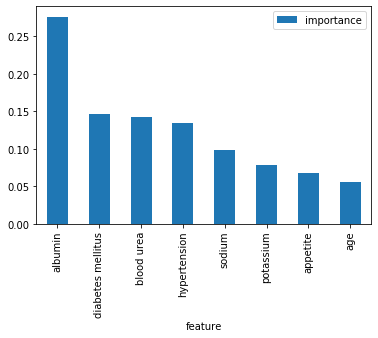

In [24]:
#weights for each feature
print("Random Forest")
i=6
print(p)
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

XGBClassifier
                   importance
feature                      
albumin                 0.617
hypertension            0.127
diabetes mellitus       0.119
appetite                0.091
sodium                  0.024
blood urea              0.023
age                     0.000
potassium               0.000


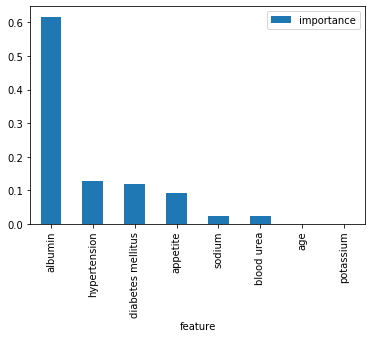

In [25]:
print("XGBClassifier")
i=7
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

                   feature_importance
appetite                     0.224735
hypertension                 0.286794
diabetes mellitus            0.191292
age                          0.002011
blood urea                   0.002006
albumin                      0.274543
sodium                       0.006061
potassium                    0.012558


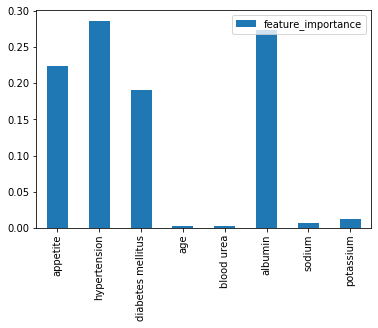

In [26]:
from sklearn.linear_model import LogisticRegression

feature_importance = abs(model[0].coef_)
feature_importance =  (feature_importance / feature_importance.sum())
index =['appetite',  'hypertension', 'diabetes mellitus',  'age', 'blood urea', 'albumin', 
    'sodium', 'potassium'] 

df = pd.DataFrame({'feature_importance': feature_importance[0]}, index=index)
print(df)
ax = df.plot.bar(rot=90)

                   feature_importance
appetite                     0.224735
hypertension                 0.286794
diabetes mellitus            0.191292
age                          0.002011
blood urea                   0.002006
albumin                      0.274543
sodium                       0.006061
potassium                    0.012558


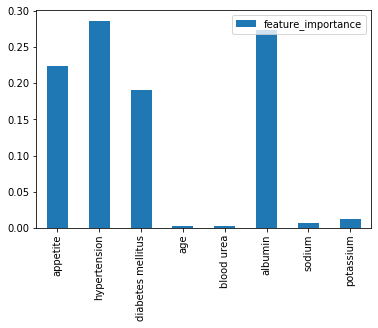

In [27]:
from sklearn.linear_model import LogisticRegression

feature_importance = abs(model[0].coef_)
feature_importance =  (feature_importance / feature_importance.sum())
index = ['appetite',  'hypertension', 'diabetes mellitus',  'age', 'blood urea', 'albumin', 
    'sodium', 'potassium']
df = pd.DataFrame({'feature_importance': feature_importance[0]}, index=index)
print(df)
ax = df.plot.bar(rot=90)

Decision Tree
                   importance
feature                      
albumin                 0.559
diabetes mellitus       0.143
age                     0.081
potassium               0.069
hypertension            0.063
sodium                  0.041
appetite                0.035
blood urea              0.008


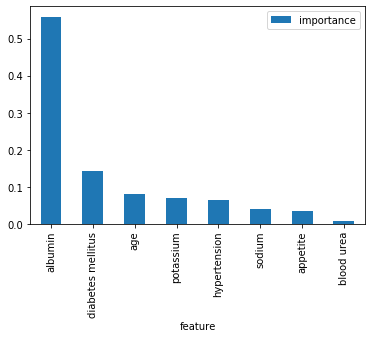

In [28]:
#weights for each feature
print("Decision Tree")
i=5
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

In [29]:
#nural network
from sklearn.neural_network import MLPClassifier
p=[]
c=[0]
t=['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 
   'pus cell clumps', 'bacteria', 'age', 'blood pressure', 'serum creatinine', 'blood urea', 'blood glucose random', 
   'albumin', 'specific gravity', 'sugar', 'hemoglobin', 'pus cell', 'sodium', 'potassium', 
   'red blood cell count', 'red blood cells','white blood cell count']   #,'packed cell volume'

for i in t:
    p+=[i]


    subdata = Data.loc[:,p+["class"]]
    subData=subdata.dropna(subset=p)

    X=subData.loc[:,p]
    Y=subData.loc[:,["class"]]
    print("\n============================================================================================")
    print("Only considering",p,"\nsize =",len(subData))
    print("============================================================================================\n\n")


    CNN = MLPClassifier(hidden_layer_sizes=(len(p),300,100,80,60,40,20,10), max_iter=250, activation='relu',solver='lbfgs',
                        verbose=20,  random_state=8,tol=0.001,alpha=0.003)

    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
    Y_train = np.array(np.ravel(Y_train)).astype(int)

    CNN.fit(X_train, Y_train)
    print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")

    

    from sklearn.metrics import confusion_matrix

    cm= confusion_matrix(Y_test,CNN.predict(X_test))

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()

    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    
    if (c[-1]>test_score):p.pop(-1)
    c+=[test_score]
    
    #print(CNN.predict_log_proba)
    



Only considering ['appetite'] 
size = 399


MLPClassifier Training Accuracy: 0.6175548589341693 

MLPClassifier  Testing Accuracy =  0.6625 

	TP: 53 	FP: 27 
	TN: 0 	FN: 0




Only considering ['appetite', 'pedal edema'] 
size = 399


MLPClassifier Training Accuracy: 0.6175548589341693 

MLPClassifier  Testing Accuracy =  0.6625 

	TP: 53 	FP: 27 
	TN: 0 	FN: 0




Only considering ['appetite', 'pedal edema', 'anemia'] 
size = 399


MLPClassifier Training Accuracy: 0.7272727272727273 

MLPClassifier  Testing Accuracy =  0.725 

	TP: 31 	FP: 0 
	TN: 27 	FN: 22




Only considering ['appetite', 'pedal edema', 'anemia', 'hypertension'] 
size = 397


MLPClassifier Training Accuracy: 0.6214511041009464 

MLPClassifier  Testing Accuracy =  0.6625 

	TP: 53 	FP: 27 
	TN: 0 	FN: 0




Only considering ['appetite', 'pedal edema', 'anemia', 'diabetes mellitus'] 
size = 397


MLPClassifier Training Accuracy: 0.6214511041009464 

MLPClassifier  Testing Accuracy =  0.6625 

	TP: 53 	FP: 27 
	TN: 

MLPClassifier Training Accuracy: 1.0 

MLPClassifier  Testing Accuracy =  1.0 

	TP: 19 	FP: 0 
	TN: 25 	FN: 0




Only considering ['appetite', 'pedal edema', 'anemia', 'diabetes mellitus', 'coronary artery disease', 'bacteria', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin', 'pus cell', 'sodium', 'potassium'] 
size = 219


MLPClassifier Training Accuracy: 0.9542857142857143 

MLPClassifier  Testing Accuracy =  0.9545454545454546 

	TP: 18 	FP: 1 
	TN: 24 	FN: 1




Only considering ['appetite', 'pedal edema', 'anemia', 'diabetes mellitus', 'coronary artery disease', 'bacteria', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin', 'pus cell', 'sodium', 'red blood cell count'] 
size = 193


MLPClassifier Training Accuracy: 1.0 

MLPClassifier  Testing Accuracy =  1.0 

	TP: 11 	FP: 0 
	TN: 28 	FN: 0




Only considering ['appetite', 'pedal edema', 'anemia', 'diabetes mellitus', 'coronary artery disease', 'bacteria', 'serum creatinine', 'blood glucose ra

In [30]:
for i in range (len(c)):
    print(i,c[i])
print(max(c))

0 0
1 0.6625
2 0.6625
3 0.725
4 0.6625
5 0.6625
6 0.6625
7 0.6455696202531646
8 0.8227848101265823
9 0.7012987012987013
10 0.5844155844155844
11 0.881578947368421
12 0.6933333333333334
13 0.9855072463768116
14 0.7540983606557377
15 0.6885245901639344
16 0.9344262295081968
17 0.9629629629629629
18 0.9807692307692307
19 1.0
20 0.9545454545454546
21 1.0
22 0.9696969696969697
23 0.717948717948718
1.0


In [31]:
#nural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

p=['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'pus cell clumps', 
   'age', 'blood pressure', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin', 'sodium', 'potassium'] 




subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]
print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


CNN = MLPClassifier(hidden_layer_sizes=(400,300,100,80,60,40,20,10), max_iter=250, activation='relu',solver='lbfgs',
                    verbose=20,  random_state=8,tol=0.001,alpha=0.03)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)

CNN.fit(X_train, Y_train)
print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test,CNN.predict(X_test))

#Extract  TN, FP ,FN, TP
TN, FP ,FN, TP =  cm.ravel()

test_score=(TP+TN)/(TN+ FP +FN+ TP)
#print(cm)
print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
print("\n"*2)

if (c[-1]>test_score):p.pop(-1)
c+=[test_score]

print(CNN.predict_log_proba)


Only considering ['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'pus cell clumps', 'age', 'blood pressure', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin', 'sodium', 'potassium'] 
size = 224


MLPClassifier Training Accuracy: 1.0 

MLPClassifier  Testing Accuracy =  1.0 

	TP: 33 	FP: 0 
	TN: 35 	FN: 0



<bound method MLPClassifier.predict_log_proba of MLPClassifier(activation='relu', alpha=0.03, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(400, 300, 100, 80, 60, 40, 20, 10),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=250, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=8,
              shuffle=True, solver='lbfgs', tol=0.001, validation_fraction=0.1,
              verbose=20, warm_start=False)>


In [32]:
p=['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'pus cell clumps', 
   'age', 'blood pressure', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin', 'sodium', 'potassium'] 


 
subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]



# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifierr"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'pus cell clumps', 'age', 'blood pressure', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin', 'sodium', 'potassium'] 
size = 224         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0] Logistic Regression Training Accuracy:  0.9871794871794872
[1] K Neighbors Regression Training Accuracy:  0.8782051282051282
[2] SVC Linear Training Accuracy:  0.9935897435897436
[3] SVC RBF Training Accuracy:  1.0
[4] Gaussian NB Training Accuracy:  0.9615384615384616
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9935897435897436
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  1.0 

	TP: 33 	FP: 0 
	TN: 35 	FN: 0



K Neighbors Testing Accuracy =  0.7647058823529411 

	TP: 18 	FP: 1 
	TN: 34 	FN: 15



SVC Linear Testing Accuracy =  0.9852941176470589 

	TP: 33 	FP: 1 
	TN: 34 	FN: 0



SVC RBF Testing Accuracy =  0.5147058823529411 

	TP: 0 	FP: 0 
	TN: 35 	FN: 33



Gaussian NB Testing Accuracy =  0.9705882352941176 

	TP: 31 	FP: 0 
	TN: 35 	FN: 2



Decision Tree Testing Accuracy =  1.0 

	TP: 33 	FP: 0 
	TN: 3

Random Forest
                         importance
feature                            
serum creatinine              0.291
hemoglobin                    0.218
hypertension                  0.117
diabetes mellitus             0.086
blood glucose random          0.083
sodium                        0.038
blood pressure                0.037
sugar                         0.035
appetite                      0.020
pedal edema                   0.020
age                           0.019
potassium                     0.016
anemia                        0.014
coronary artery disease       0.003
pus cell clumps               0.002


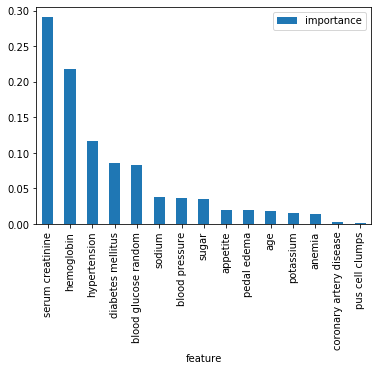

In [33]:
#weights for each feature
print("Random Forest")
i=6
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

Decision Tree
                         importance
feature                            
serum creatinine              0.744
hemoglobin                    0.205
diabetes mellitus             0.051
appetite                      0.000
pedal edema                   0.000
anemia                        0.000
hypertension                  0.000
coronary artery disease       0.000
pus cell clumps               0.000
age                           0.000
blood pressure                0.000
blood glucose random          0.000
sugar                         0.000
sodium                        0.000
potassium                     0.000


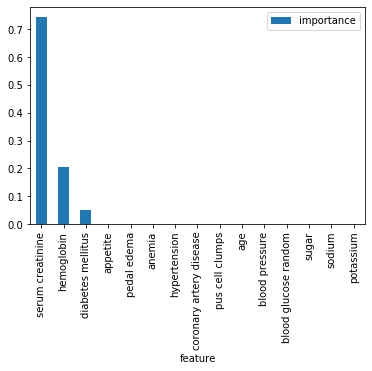

In [34]:
#weights for each feature
print("Decision Tree")
i=5
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

XGBClassifier
                         importance
feature                            
serum creatinine              0.757
hemoglobin                    0.146
hypertension                  0.097
appetite                      0.000
pedal edema                   0.000
anemia                        0.000
diabetes mellitus             0.000
coronary artery disease       0.000
pus cell clumps               0.000
age                           0.000
blood pressure                0.000
blood glucose random          0.000
sugar                         0.000
sodium                        0.000
potassium                     0.000


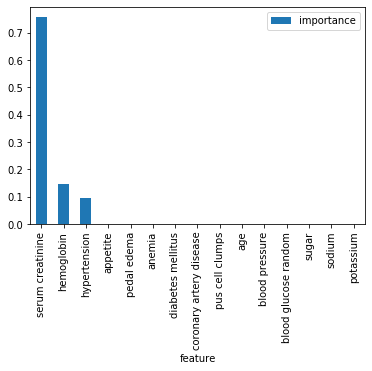

In [35]:
#weights for each feature
print("XGBClassifier")
i=7
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

                         feature_importance
appetite                           0.003458
pedal edema                        0.082078
anemia                             0.002512
hypertension                       0.128498
diabetes mellitus                  0.118109
coronary artery disease            0.000263
pus cell clumps                    0.001280
age                                0.003695
blood pressure                     0.005908
serum creatinine                   0.322821
blood glucose random               0.006377
sugar                              0.089572
hemoglobin                         0.216125
sodium                             0.009216
potassium                          0.010089


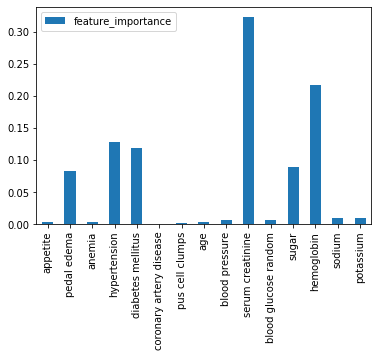

In [36]:
from sklearn.linear_model import LogisticRegression

feature_importance = abs(model[0].coef_)
feature_importance =  (feature_importance / feature_importance.sum())
index = ['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease',
             'pus cell clumps', 'age', 'blood pressure', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin', 'sodium', 'potassium'] 


df = pd.DataFrame({'feature_importance': feature_importance[0]}, index=index)
print(df)
ax = df.plot.bar(rot=90)

In [37]:
#p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin' ]
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin','blood glucose random','serum creatinine', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'hypertension', 'albumin', 'blood glucose random', 'serum creatinine', 'pus cell'] 
size = 260         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0] Logistic Regression Training Accuracy:  0.9951923076923077
[1] K Neighbors Regression Training Accuracy:  0.9519230769230769
[2] SVC Linear Training Accuracy:  0.9951923076923077
[3] SVC RBF Training Accuracy:  0.9951923076923077
[4] Gaussian NB Training Accuracy:  0.9759615384615384
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9951923076923077
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9423076923076923 

	TP: 27 	FP: 0 
	TN: 22 	FN: 3



K Neighbors Testing Accuracy =  0.8846153846153846 

	TP: 24 	FP: 0 
	TN: 22 	FN: 6



SVC Linear Testing Accuracy =  0.9423076923076923 

	TP: 27 	FP: 0 
	TN: 22 	FN: 3



SVC RBF Testing Accuracy =  0.9423076923076923 

	TP: 28 	FP: 1 
	TN: 21 	FN: 2



Gaussian NB Testing Accuracy =  0.9230769230769231 

	TP: 26 	FP: 0 
	TN: 22 	FN: 4



Decision Tree Testing Accuracy = 

Decision Tree
                      importance
feature                         
hemoglobin                 0.749
specific gravity           0.212
albumin                    0.039
hypertension               0.000
blood glucose random       0.000
serum creatinine           0.000
pus cell                   0.000


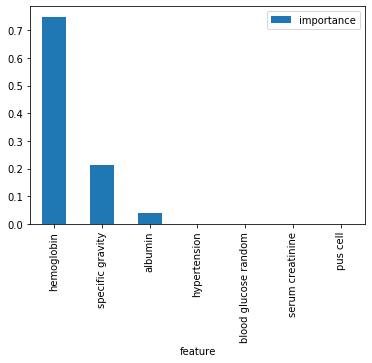

In [38]:
#weights for each feature
print("Decision Tree")
i=5
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

[Text(111.60000000000001, 190.26, 'X[1] <= 12.85\nentropy = 1.0\nsamples = 208\nvalue = [103, 105]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 94\nvalue = [0, 94]'),
 Text(167.4, 135.9, 'X[0] <= 1.017\nentropy = 0.458\nsamples = 114\nvalue = [103, 11]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(223.20000000000002, 81.53999999999999, 'X[3] <= 0.5\nentropy = 0.078\nsamples = 104\nvalue = [103, 1]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 103\nvalue = [103, 0]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

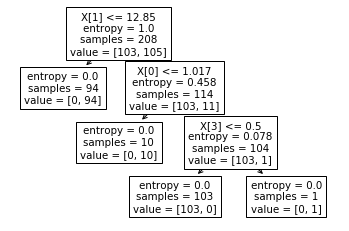

In [39]:
from sklearn import tree
tree.plot_tree(model[5])

Random Forest
                      importance
feature                         
hemoglobin                 0.347
serum creatinine           0.178
albumin                    0.170
specific gravity           0.152
hypertension               0.100
blood glucose random       0.044
pus cell                   0.009


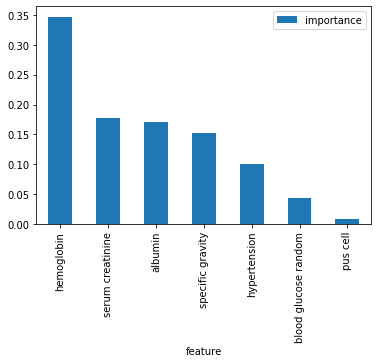

In [40]:
#weights for each feature
print("Random Forest")
i=6
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

XGBClassifier
                      importance
feature                         
serum creatinine           0.495
hemoglobin                 0.375
specific gravity           0.129
hypertension               0.000
albumin                    0.000
blood glucose random       0.000
pus cell                   0.000


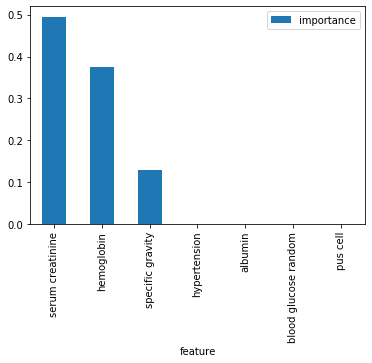

In [41]:
#weights for each feature
print("XGBClassifier")
i=7
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

Extra Trees Classifier
                      importance
feature                         
specific gravity           0.238
albumin                    0.231
hypertension               0.204
hemoglobin                 0.153
pus cell                   0.077
serum creatinine           0.056
blood glucose random       0.041


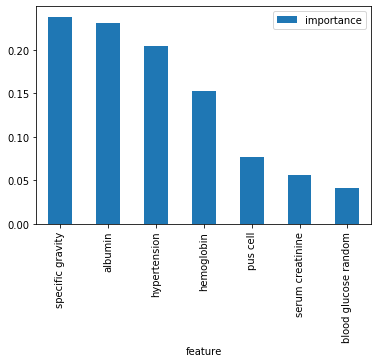

In [42]:
#weights for each feature
print("Extra Trees Classifier")
i=8
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

AdaBoostClassifier
                      importance
feature                         
hemoglobin                  0.34
hypertension                0.22
specific gravity            0.20
serum creatinine            0.13
albumin                     0.11
blood glucose random        0.00
pus cell                    0.00


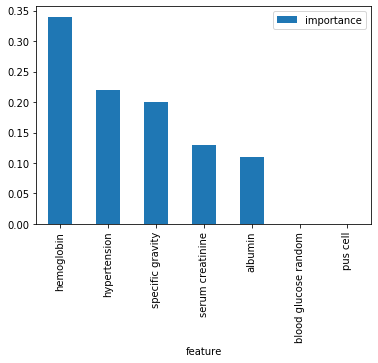

In [43]:
#weights for each feature
print("AdaBoostClassifier")
i=9
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

In [44]:
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin','blood glucose random','serum creatinine', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)
print(len(subData))
X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400
260

Only considering ['specific gravity', 'hemoglobin', 'hypertension', 'albumin', 'blood glucose random', 'serum creatinine', 'pus cell'] 
size = 260         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0] Logistic Regression Training Accuracy:  0.9951923076923077
[1] K Neighbors Regression Training Accuracy:  0.9519230769230769
[2] SVC Linear Training Accuracy:  0.9951923076923077
[3] SVC RBF Training Accuracy:  0.9951923076923077
[4] Gaussian NB Training Accuracy:  0.9759615384615384
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9951923076923077
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9423076923076923 

	TP: 27 	FP: 0 
	TN: 22 	FN: 3



K Neighbors Testing Accuracy =  0.8846153846153846 

	TP: 24 	FP: 0 
	TN: 22 	FN: 6



SVC Linear Testing Accuracy =  0.9423076923076923 

	TP: 27 	FP: 0 
	TN: 22 	FN: 3



SVC RBF Testing Accuracy =  0.9423076923076923 

	TP: 28 	FP: 1 
	TN: 21 	FN: 2



Gaussian NB Testing Accuracy =  0.9230769230769231 

	TP: 26 	FP: 0 
	TN: 22 	FN: 4



Decision Tree Testing Accuracy = 

In [45]:
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin','blood glucose random','serum creatinine' ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'hypertension', 'albumin', 'blood glucose random', 'serum creatinine'] 
size = 273         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0] Logistic Regression Training Accuracy:  0.9908256880733946
[1] K Neighbors Regression Training Accuracy:  0.9678899082568807
[2] SVC Linear Training Accuracy:  0.9862385321100917
[3] SVC RBF Training Accuracy:  1.0
[4] Gaussian NB Training Accuracy:  0.963302752293578
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9908256880733946
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9818181818181818 

	TP: 32 	FP: 0 
	TN: 22 	FN: 1



K Neighbors Testing Accuracy =  0.8727272727272727 

	TP: 26 	FP: 0 
	TN: 22 	FN: 7



SVC Linear Testing Accuracy =  0.9818181818181818 

	TP: 32 	FP: 0 
	TN: 22 	FN: 1



SVC RBF Testing Accuracy =  0.9818181818181818 

	TP: 32 	FP: 0 
	TN: 22 	FN: 1



Gaussian NB Testing Accuracy =  0.9454545454545454 

	TP: 30 	FP: 0 
	TN: 22 	FN: 3



Decision Tree Testing Accuracy =  1.0 

	TP: 33 	

In [46]:
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin','blood glucose random', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'hypertension', 'albumin', 'blood glucose random', 'pus cell'] 
size = 264         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9715639810426541
[1] K Neighbors Regression Training Accuracy:  0.9478672985781991
[2] SVC Linear Training Accuracy:  0.981042654028436
[3] SVC RBF Training Accuracy:  0.985781990521327
[4] Gaussian NB Training Accuracy:  0.933649289099526
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.995260663507109
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  1.0 

	TP: 34 	FP: 0 
	TN: 19 	FN: 0



K Neighbors Testing Accuracy =  0.9433962264150944 

	TP: 31 	FP: 0 
	TN: 19 	FN: 3



SVC Linear Testing Accuracy =  1.0 

	TP: 34 	FP: 0 
	TN: 19 	FN: 0



SVC RBF Testing Accuracy =  0.9622641509433962 

	TP: 34 	FP: 2 
	

In [47]:
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin','serum creatinine', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'hypertension', 'albumin', 'serum creatinine', 'pus cell'] 
size = 283         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9734513274336283
[1] K Neighbors Regression Training Accuracy:  0.9734513274336283
[2] SVC Linear Training Accuracy:  0.9778761061946902
[3] SVC RBF Training Accuracy:  0.9823008849557522
[4] Gaussian NB Training Accuracy:  0.9557522123893806
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9911504424778761
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9649122807017544 

	TP: 34 	FP: 0 
	TN: 21 	FN: 2



K Neighbors Testing Accuracy =  0.9649122807017544 

	TP: 34 	FP: 0 
	TN: 21 	FN: 2



SVC Linear Testing Accuracy =  0.9649122807017544 

	TP: 34 	FP: 0 
	TN: 21 	FN: 2



SVC RBF Testing Accuracy =  0.964912

In [48]:
p=[ 'specific gravity', 'hemoglobin','hypertension','blood glucose random','serum creatinine', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'hypertension', 'blood glucose random', 'serum creatinine', 'pus cell'] 
size = 261         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0] Logistic Regression Training Accuracy:  0.9951923076923077
[1] K Neighbors Regression Training Accuracy:  0.9375
[2] SVC Linear Training Accuracy:  0.9951923076923077
[3] SVC RBF Training Accuracy:  0.9951923076923077
[4] Gaussian NB Training Accuracy:  0.9519230769230769
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9903846153846154
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9056603773584906 

	TP: 27 	FP: 0 
	TN: 21 	FN: 5



K Neighbors Testing Accuracy =  0.8679245283018868 

	TP: 25 	FP: 0 
	TN: 21 	FN: 7



SVC Linear Testing Accuracy =  0.9056603773584906 

	TP: 27 	FP: 0 
	TN: 21 	FN: 5



SVC RBF Testing Accuracy =  0.9811320754716981 

	TP: 31 	FP: 0 
	TN: 21 	FN: 1



Gaussian NB Testing Accuracy =  0.8867924528301887 

	TP: 26 	FP: 0 
	TN: 21 	FN: 6



Decision Tree Testing Accuracy =  1.0 

	TP: 

In [49]:
p=[ 'specific gravity','hypertension',  'albumin','blood glucose random','serum creatinine', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hypertension', 'albumin', 'blood glucose random', 'serum creatinine', 'pus cell'] 
size = 288         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0] Logistic Regression Training Accuracy:  0.9565217391304348
[1] K Neighbors Regression Training Accuracy:  0.8869565217391304
[2] SVC Linear Training Accuracy:  0.9521739130434783
[3] SVC RBF Training Accuracy:  0.9391304347826087
[4] Gaussian NB Training Accuracy:  0.9565217391304348
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.991304347826087
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9310344827586207 

	TP: 32 	FP: 0 
	TN: 22 	FN: 4



K Neighbors Testing Accuracy =  0.896551724137931 

	TP: 30 	FP: 0 
	TN: 22 	FN: 6



SVC Linear Testing Accuracy =  0.9137931034482759 

	TP: 31 	FP: 0 
	TN: 22 	FN: 5



SVC RBF Testing Accuracy =  0.9137931034482759 

	TP: 31 	FP: 0 
	TN: 22 	FN: 5



Gaussian NB Testing Accuracy =  0.9310344827586207 

	TP: 32 	FP: 0 
	TN: 22 	FN: 4



Decision Tree Testing Accuracy =  1

In [50]:
p=[ 'specific gravity', 'albumin','hypertension', 'pus cell'  ]
#p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]

print(len(Data))
 
subdata = Data.loc[:,p+["class"]]
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'albumin', 'hypertension', 'pus cell'] 
size = 329         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9201520912547528
[1] K Neighbors Regression Training Accuracy:  0.9847908745247148
[2] SVC Linear Training Accuracy:  0.9201520912547528
[3] SVC RBF Training Accuracy:  0.9201520912547528
[4] Gaussian NB Training Accuracy:  0.9201520912547528
[5] Decision Tree Training Accuracy:  0.9847908745247148
[6] Random Forest Training Accuracy:  0.9847908745247148
[7] XGBClassifier Training Accuracy:  0.9809885931558935
[8] ExtraTreesClassifier Training Accuracy:  0.9847908745247148
[9] AdaBoostClassifierr Training Accuracy:  0.9847908745247148


Logistic Regression Testing Accuracy =  0.8939393939393939 

	TP: 26 	FP: 0 
	TN: 33 	FN: 7



K Neighbors Testing Accuracy =  0.9848484848484849 

	TP: 32 	FP: 0 
	TN: 33 	FN: 1



SVC Linear Testing Accuracy =  0.8939393939393939 

	TP: 26 	FP: 0 
	TN: 33 	FN: 7



SVC RBF Te

In [51]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-5*iqr
    fence_high = q3+5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [52]:
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(Data))
p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine' ]
subdata = Data.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_T,Y_train,Y_T=train_test_split(X,Y,test_size=0.3,random_state=4)
X_CV,X_test,Y_CV,Y_test=train_test_split(X_T,Y_T,test_size=0.5,random_state=4)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'albumin', 'hypertension', 'pus cell', 'blood glucose random', 'serum creatinine'] 
size = 260         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9835164835164835
[1] K Neighbors Regression Training Accuracy:  0.9395604395604396
[2] SVC Linear Training Accuracy:  0.978021978021978
[3] SVC RBF Training Accuracy:  0.989010989010989
[4] Gaussian NB Training Accuracy:  0.9505494505494505
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.989010989010989
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



K Neighbors Testing Accuracy =  0.8717948717948718 

	TP: 16 	FP: 0 
	TN: 18 	FN: 5



SVC Linear Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



SVC RBF Testing Accuracy =  0.923076923076923

In [53]:
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_CV,model[i].predict(X_CV))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

Logistic Regression Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



K Neighbors Testing Accuracy =  0.9743589743589743 

	TP: 20 	FP: 0 
	TN: 18 	FN: 1



SVC Linear Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



SVC RBF Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



Gaussian NB Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



Decision Tree Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



Random Forest Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



XGBClassifier Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



ExtraTreesClassifier Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0



AdaBoostClassifier Testing Accuracy =  1.0 

	TP: 21 	FP: 0 
	TN: 18 	FN: 0





In [54]:
subData.describe() #distribution after drop NA

,specific gravity,hemoglobin,albumin,hypertension,pus cell,blood glucose random,serum creatinine,class
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,1.018000,12.835385,0.973077,0.342308,0.211538,146.084615,2.452308,0.519231
std,0.005732,2.833606,1.351121,0.475397,0.409187,80.098688,3.214980,0.500594
min,1.005000,3.100000,0.000000,0.000000,0.000000,22.000000,0.400000,0.000000
25%,1.015000,10.800000,0.000000,0.000000,0.000000,99.000000,0.800000,0.000000
50%,1.020000,13.200000,0.000000,0.000000,0.000000,120.000000,1.200000,1.000000
75%,1.025000,15.000000,2.000000,1.000000,0.000000,157.250000,2.500000,1.000000
max,1.025000,17.800000,4.000000,1.000000,1.000000,490.000000,24.000000,1.000000


In [55]:
subdata.describe()#Distribution without dropping NA

,specific gravity,hemoglobin,albumin,hypertension,pus cell,blood glucose random,serum creatinine,class
count,353.000000,348.000000,354.000000,398.000000,335.000000,356.000000,383.000000,400.000000
mean,1.017408,12.526437,1.016949,0.369347,0.226866,148.036517,3.072454,0.625000
std,0.005717,2.912587,1.352679,0.483235,0.419431,79.281714,5.741126,0.484729
min,1.005000,3.100000,0.000000,0.000000,0.000000,22.000000,0.400000,0.000000
25%,1.010000,10.300000,0.000000,0.000000,0.000000,99.000000,0.900000,0.000000
50%,1.020000,12.650000,0.000000,0.000000,0.000000,121.000000,1.300000,1.000000
75%,1.020000,15.000000,2.000000,1.000000,0.000000,163.000000,2.800000,1.000000
max,1.025000,17.800000,5.000000,1.000000,1.000000,490.000000,76.000000,1.000000


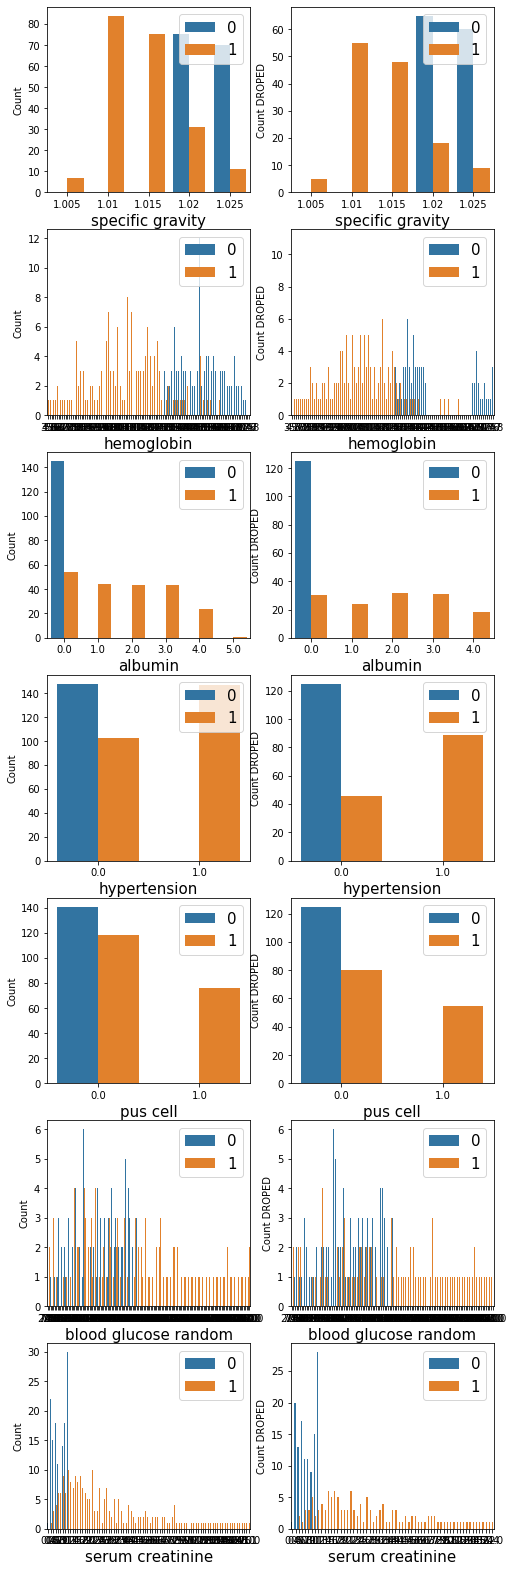

In [56]:
# Class Distribution
cols=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]

#make the subplot size
n_cols=2
n_rows=7
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*4,n_rows*4))
for c in range (len(cols)):
    ax = axs[c][0]
    sns.countplot(subdata[cols[c]],hue=subdata["class"],ax=ax)
    ax.legend(loc="upper right",fontsize=15)
    ax.set_xlabel(cols[c],fontsize=15);
    ax.set_ylabel('Count',fontsize=10);
    
    ax = axs[c][1]
    sns.countplot(subData[cols[c]],hue=subData["class"],ax=ax)
    ax.legend(loc="upper right",fontsize=15)
    ax.set_xlabel(cols[c],fontsize=15);
    ax.set_ylabel('Count DROPED',fontsize=10);
    


In [205]:
import numpy as np
from sklearn.impute import KNNImputer


p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine' ]

P=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random',
   'serum creatinine' ]+["class"]

subdata_in = Data.loc[:,P]

X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=400)
subData=imputer.fit_transform(subdata_in)
print(type(subData))

D=dict()
for i in range (len(P)):
    D[P[i]]=subData[:, i]

filledData = pd.DataFrame(D)

filledData.describe()




<class 'numpy.ndarray'>


,specific gravity,hemoglobin,albumin,hypertension,pus cell,blood glucose random,serum creatinine,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.017408,12.526437,1.016949,0.369347,0.226866,148.036517,3.072454,0.625000
std,0.005369,2.716171,1.272318,0.482023,0.383750,74.782634,5.617490,0.484729
min,1.005000,3.100000,0.000000,0.000000,0.000000,22.000000,0.400000,0.000000
25%,1.015000,10.875000,0.000000,0.000000,0.000000,101.000000,0.900000,0.000000
50%,1.017408,12.526437,1.000000,0.000000,0.000000,126.000000,1.400000,1.000000
75%,1.020000,14.625000,2.000000,1.000000,0.226866,150.000000,3.072454,1.000000
max,1.025000,17.800000,5.000000,1.000000,1.000000,490.000000,76.000000,1.000000


In [58]:
subdata.describe()#Distribution without dropping NA

,specific gravity,hemoglobin,albumin,hypertension,pus cell,blood glucose random,serum creatinine,class
count,353.000000,348.000000,354.000000,398.000000,335.000000,356.000000,383.000000,400.000000
mean,1.017408,12.526437,1.016949,0.369347,0.226866,148.036517,3.072454,0.625000
std,0.005717,2.912587,1.352679,0.483235,0.419431,79.281714,5.741126,0.484729
min,1.005000,3.100000,0.000000,0.000000,0.000000,22.000000,0.400000,0.000000
25%,1.010000,10.300000,0.000000,0.000000,0.000000,99.000000,0.900000,0.000000
50%,1.020000,12.650000,0.000000,0.000000,0.000000,121.000000,1.300000,1.000000
75%,1.020000,15.000000,2.000000,1.000000,0.000000,163.000000,2.800000,1.000000
max,1.025000,17.800000,5.000000,1.000000,1.000000,490.000000,76.000000,1.000000


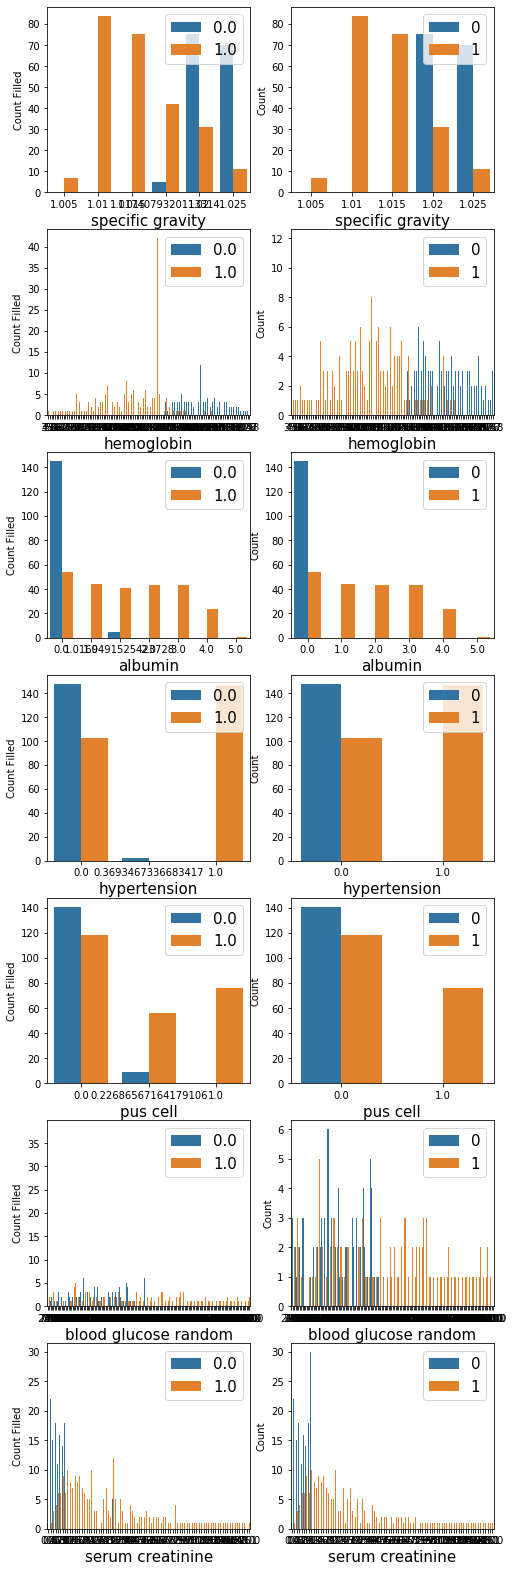

In [59]:
# Class Distribution
cols=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]

#make the subplot size
n_cols=2
n_rows=7
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*4,n_rows*4))
for c in range (len(cols)):
    ax = axs[c][0]
    sns.countplot(filledData[cols[c]],hue=filledData["class"],ax=ax)
    ax.legend(loc="upper right",fontsize=15)
    ax.set_xlabel(cols[c],fontsize=15);
    ax.set_ylabel('Count Filled',fontsize=10);
    
    ax = axs[c][1]
    sns.countplot(Data[cols[c]],hue=Data["class"],ax=ax)
    ax.legend(loc="upper right",fontsize=15)
    ax.set_xlabel(cols[c],fontsize=15);
    ax.set_ylabel('Count',fontsize=10);

In [60]:
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(filledData))
p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine' ]
subdata = filledData.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.8,random_state=43)
#X_CV,X_test,Y_CV,Y_test=train_test_split(X_T,Y_T,test_size=0.5,random_state=4)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'albumin', 'hypertension', 'pus cell', 'blood glucose random', 'serum creatinine'] 
size = 400         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9875
[1] K Neighbors Regression Training Accuracy:  0.925
[2] SVC Linear Training Accuracy:  0.9875
[3] SVC RBF Training Accuracy:  1.0
[4] Gaussian NB Training Accuracy:  0.9625
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.975
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.946875 

	TP: 194 	FP: 3 
	TN: 109 	FN: 14



K Neighbors Testing Accuracy =  0.79375 

	TP: 149 	FP: 7 
	TN: 105 	FN: 59



SVC Linear Testing Accuracy =  0.95 

	TP: 195 	FP: 3 
	TN: 109 	FN: 13



SVC RBF Testing Accuracy =  0.915625 

	TP: 195 	FP: 14 
	TN: 98 	FN: 13



Gaussian NB Testing Accuracy =  0.93437

In [61]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-5*iqr
    fence_high = q3+5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [62]:
p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]
print(len(filledData))
D0=remove_outlier(filledData, p[0])
print(len(D0),p[0],len(subdata)-len(D0))
D1=remove_outlier(D0, p[1])
print(len(D1),p[1],len(D0)-len(D1))
D2=remove_outlier(D1, p[2])
print(len(D2),p[2],len(D1)-len(D2))
D3=remove_outlier(D2, p[3])
print(len(D3),p[3],len(D2)-len(D3))

D5=remove_outlier(D3, p[5])
print(len(D5),p[5],len(D3)-len(D5))
D6=remove_outlier(D5, p[6])
print(len(D6),p[6],len(D5)-len(D6))

D6.describe()

400
400 specific gravity 0
400 hemoglobin 0
400 albumin 0
400 hypertension 0
390 blood glucose random 10
379 serum creatinine 11


,specific gravity,hemoglobin,albumin,hypertension,pus cell,blood glucose random,serum creatinine,class
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,1.017615,12.624914,0.967577,0.355511,0.210656,139.909060,2.408468,0.604222
std,0.005330,2.713404,1.266806,0.478013,0.372042,58.632193,2.601541,0.489664
min,1.005000,3.100000,0.000000,0.000000,0.000000,22.000000,0.400000,0.000000
25%,1.015000,10.900000,0.000000,0.000000,0.000000,100.000000,0.900000,0.000000
50%,1.017408,12.526437,0.000000,0.000000,0.000000,124.000000,1.300000,1.000000
75%,1.020000,14.800000,2.000000,1.000000,0.226866,148.036517,2.900000,1.000000
max,1.025000,17.800000,5.000000,1.000000,1.000000,380.000000,13.800000,1.000000


In [63]:
p=[ 'specific gravity', 'hemoglobin','hypertension',  'albumin', 'pus cell'  ]
#'blood glucose random','serum creatinine', 'pus cell' ,'hypertension',  'albumin',

print(len(filledData))
p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine' ]
subdata = filledData.loc[:,p+["class"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_T,Y_train,Y_T=train_test_split(X,Y,test_size=0.3,random_state=3)
X_CV,X_test,Y_CV,Y_test=train_test_split(X_T,Y_T,test_size=0.5,random_state=4)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
print("==========================================================================================")  
for i in range (len(model)):
    cm= confusion_matrix(Y_CV,model[i].predict(X_CV))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'CV Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['specific gravity', 'hemoglobin', 'albumin', 'hypertension', 'pus cell', 'blood glucose random', 'serum creatinine'] 
size = 400         Train and test set 70% : 30%




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0] Logistic Regression Training Accuracy:  0.9785714285714285
[1] K Neighbors Regression Training Accuracy:  0.9642857142857143
[2] SVC Linear Training Accuracy:  0.9785714285714285
[3] SVC RBF Training Accuracy:  0.9821428571428571
[4] Gaussian NB Training Accuracy:  0.9392857142857143
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9928571428571429
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9666666666666667 

	TP: 42 	FP: 0 
	TN: 16 	FN: 2



K Neighbors Testing Accuracy =  0.85 

	TP: 37 	FP: 2 
	TN: 14 	FN: 7



SVC Linear Testing Accuracy =  0.9666666666666667 

	TP: 42 	FP: 0 
	TN: 16 	FN: 2



SVC RBF Testing Accuracy =  0.9333333333333333 

	TP: 43 	FP: 3 
	TN: 13 	FN: 1



Gaussian NB Testing Accuracy =  0.95 

	TP: 42 	FP: 1 
	TN: 15 	FN: 2



Decision Tree Testing Accuracy =  0.9666666666666667 

	TP: 4

In [210]:
import numpy as np
from sklearn.impute import KNNImputer

X = Data.drop(columns=["red blood cells","sodium","potassium","white blood cell count" , "red blood cell count","packed cell volume"])
imputer = KNNImputer(n_neighbors=200)
filleddata=imputer.fit_transform(X)

D=dict()
for i in  range (len(X.columns)):
    D[X.columns[i]]=filleddata[:,i]
filledData=pd.DataFrame(D)

filledData.describe()

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.470200,76.433250,1.017463,1.002975,0.430638,0.221937,0.105500,0.05525,147.830363,57.298679,3.059399,12.609504,0.368113,0.343000,0.085125,0.794775,0.190288,0.150150,0.625000
std,16.980651,13.481983,0.005385,1.276710,1.034024,0.385012,0.306806,0.22822,74.896233,49.305994,5.619711,2.739532,0.482341,0.474832,0.279199,0.404118,0.392695,0.357468,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.00000,22.000000,1.500000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.00000,101.000000,27.000000,0.900000,10.875000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,79.475000,1.018787,0.422500,0.000000,0.000000,0.000000,0.00000,126.000000,44.000000,1.400000,12.990000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.096250,0.225000,0.000000,0.00000,158.936250,64.078250,2.825000,14.625000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.00000,490.000000,391.000000,76.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [211]:
imputer.get_params

<bound method BaseEstimator.get_params of KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=200, weights='uniform')>

In [212]:
X.describe()

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,348.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,12.526437,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,2.912587,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,10.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,12.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


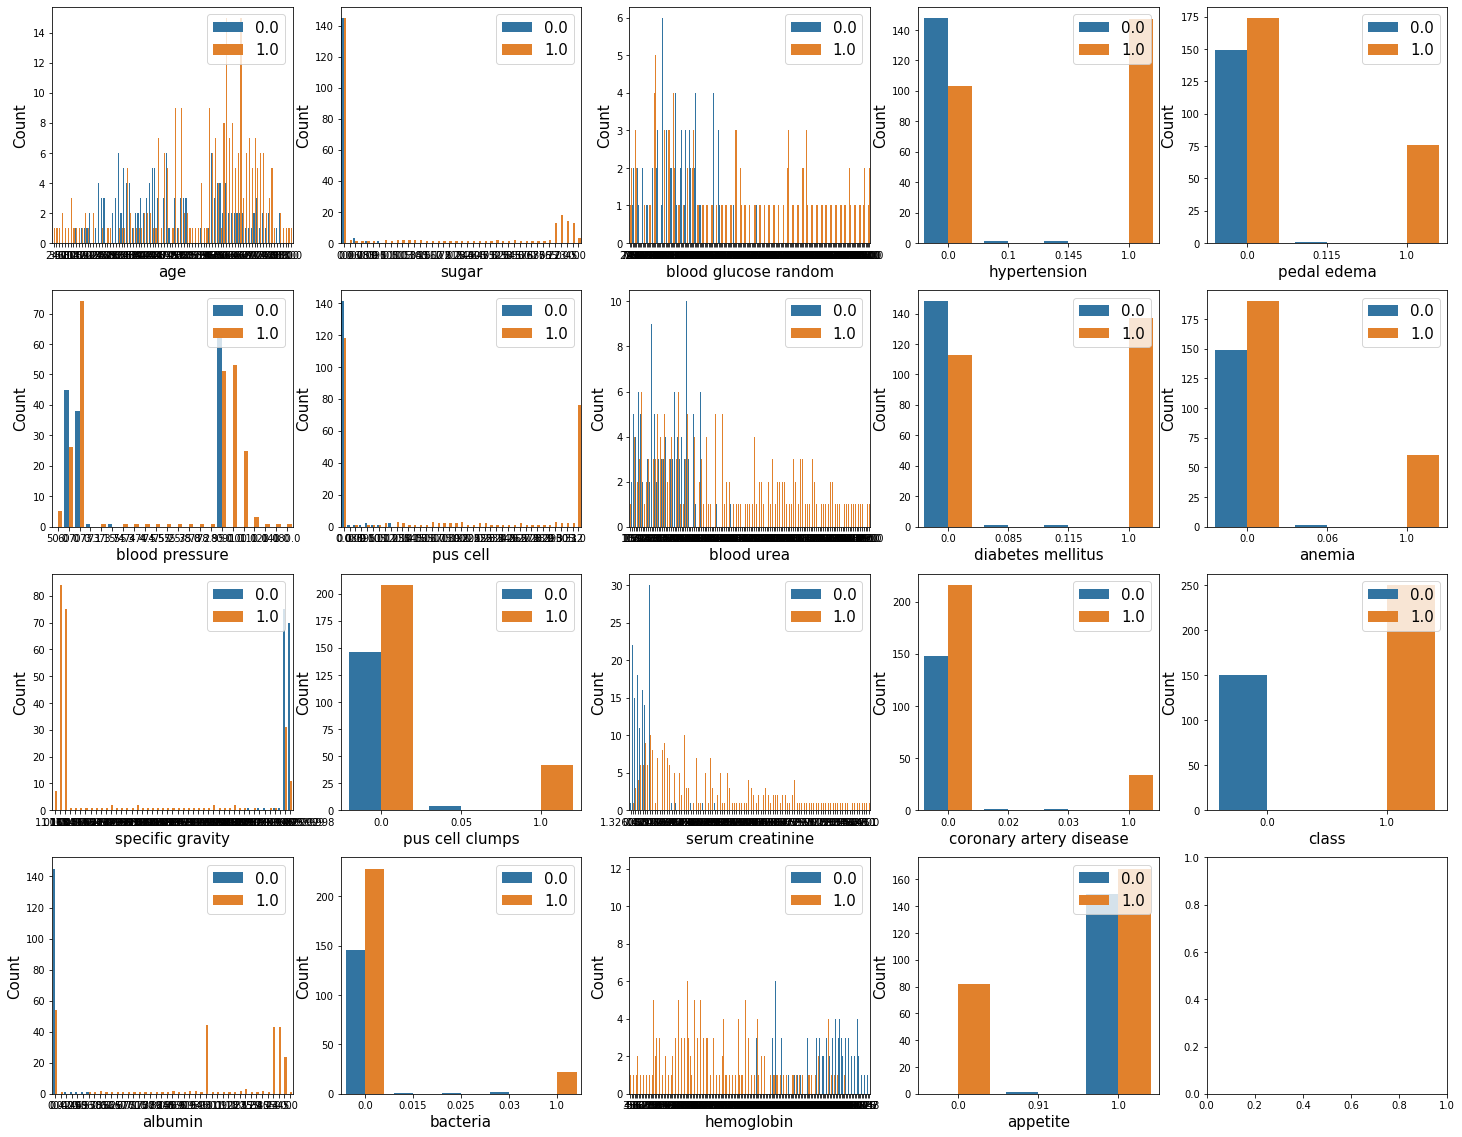

In [213]:
# Class Distribution
cols=filledData.columns

#make the subplot size
n_cols=5
n_rows=4
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*5,n_rows*5))
for c in range (n_cols):
    for r in range (n_rows):
        i=c*n_rows + r #index to subplot
        if (i==19):break
        ax = axs[r][c]
        sns.countplot(filledData[cols[i]],hue=filledData["class"],ax=ax)
        ax.legend(loc="upper right",fontsize=15)
        ax.set_xlabel(cols[i],fontsize=15);
        ax.set_ylabel('Count',fontsize=15);

In [214]:
#==========================================================================================================================
#                                                   B  E  S   T
#==========================================================================================================================
highCo=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]





p=[ "hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",'serum creatinine']
#p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]
#p=highCo
print(len(Data))
 
subdata = filledData.loc[:,p+["class"]]   
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['hemoglobin', 'specific gravity', 'albumin', 'hypertension', 'diabetes mellitus', 'serum creatinine'] 
size = 400         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9642857142857143
[1] K Neighbors Regression Training Accuracy:  0.9571428571428572
[2] SVC Linear Training Accuracy:  0.9607142857142857
[3] SVC RBF Training Accuracy:  0.9642857142857143
[4] Gaussian NB Training Accuracy:  0.9428571428571428
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9928571428571429
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9833333333333333 

	TP: 80 	FP: 0 
	TN: 38 	FN: 2



K Neighbors Testing Accuracy =  0.975 

	TP: 79 	FP: 0 
	TN: 38 	FN: 3



SVC Linear Testing Accuracy =  0.9666666666666667 

	TP: 78 	FP: 0 
	TN: 38 	FN: 4



SVC RBF Testing Accuracy =  0.9833333333

Decision Tree
                      importance
feature                         
specific gravity           0.580
albumin                    0.265
hemoglobin                 0.103
serum creatinine           0.031
blood glucose random       0.022
hypertension               0.000
diabetes mellitus          0.000


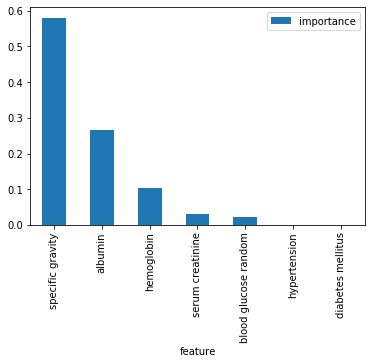

In [69]:
#weights for each feature
print("Decision Tree")
i=5
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

[Text(111.60000000000001, 199.32, 'X[0] <= 1.019\nentropy = 0.971\nsamples = 280\nvalue = [112, 168]'),
 Text(55.800000000000004, 163.07999999999998, 'entropy = 0.0\nsamples = 134\nvalue = [0, 134]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 0.588\nentropy = 0.783\nsamples = 146\nvalue = [112, 34]'),
 Text(111.60000000000001, 126.83999999999999, 'X[1] <= 12.85\nentropy = 0.353\nsamples = 120\nvalue = [112, 8]'),
 Text(55.800000000000004, 90.6, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(167.4, 90.6, 'X[6] <= 1.3\nentropy = 0.127\nsamples = 114\nvalue = [112, 2]'),
 Text(111.60000000000001, 54.359999999999985, 'entropy = 0.0\nsamples = 107\nvalue = [107, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'X[4] <= 121.0\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(167.4, 18.119999999999976, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 18.119999999999976, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'entro

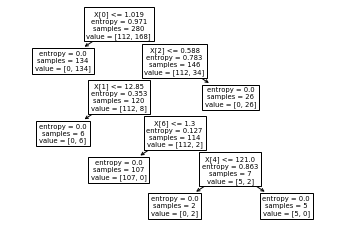

In [70]:
from sklearn import tree
tree.plot_tree(model[5])

Random Forest
                      importance
feature                         
hemoglobin                 0.288
specific gravity           0.242
albumin                    0.187
serum creatinine           0.159
blood glucose random       0.056
hypertension               0.040
diabetes mellitus          0.028


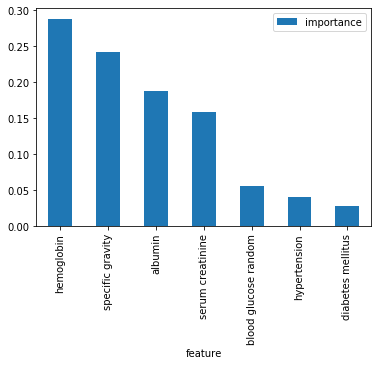

In [71]:
#weights for each feature
print("Random Forest")
i=6
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

XGBClassifier
                      importance
feature                         
serum creatinine           0.523
hemoglobin                 0.248
specific gravity           0.125
albumin                    0.078
blood glucose random       0.025
hypertension               0.000
diabetes mellitus          0.000


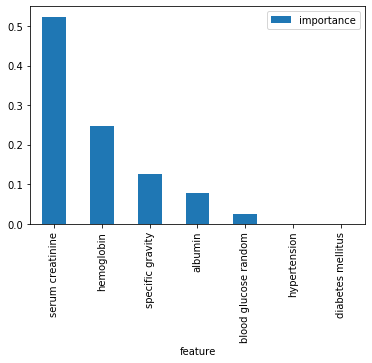

In [72]:
#weights for each feature
print("XGBClassifier")
i=7
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

Extra Trees Classifier
                      importance
feature                         
specific gravity           0.242
hypertension               0.175
albumin                    0.173
hemoglobin                 0.150
diabetes mellitus          0.142
serum creatinine           0.062
blood glucose random       0.055


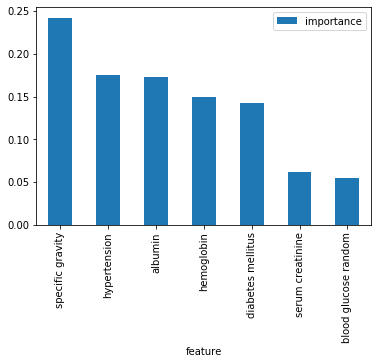

In [73]:
#weights for each feature
print("Extra Trees Classifier")
i=8
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

AdaBoostClassifier
                      importance
feature                         
hemoglobin                  0.33
serum creatinine            0.32
specific gravity            0.14
blood glucose random        0.13
albumin                     0.08
hypertension                0.00
diabetes mellitus           0.00


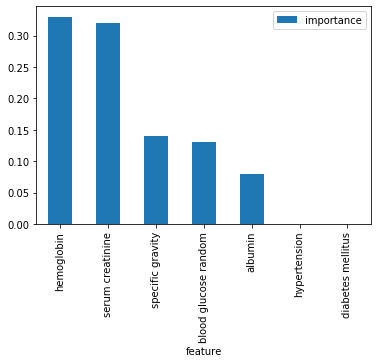

In [74]:
#weights for each feature
print("AdaBoostClassifier")
i=9
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

In [75]:
subdata_in.to_csv(r'Z:\ML\Chronic_Kidney_Disease\Pre Processing\editedData.csv')



In [76]:
filledData.describe()

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.470200,76.433250,1.017463,1.002975,0.430638,0.221937,0.105500,0.05525,147.830363,57.298679,3.059399,12.609504,0.368113,0.343000,0.085125,0.794775,0.190288,0.150150,0.625000
std,16.980651,13.481983,0.005385,1.276710,1.034024,0.385012,0.306806,0.22822,74.896233,49.305994,5.619711,2.739532,0.482341,0.474832,0.279199,0.404118,0.392695,0.357468,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.00000,22.000000,1.500000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.00000,101.000000,27.000000,0.900000,10.875000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,79.475000,1.018787,0.422500,0.000000,0.000000,0.000000,0.00000,126.000000,44.000000,1.400000,12.990000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.096250,0.225000,0.000000,0.00000,158.936250,64.078250,2.825000,14.625000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.00000,490.000000,391.000000,76.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


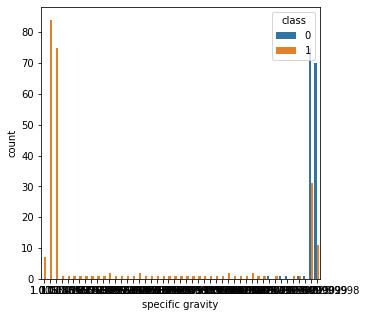

In [77]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(filledData['specific gravity'],hue=Data["class"])

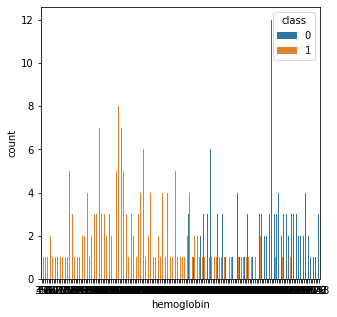

In [78]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(filledData['hemoglobin'],hue=Data["class"])

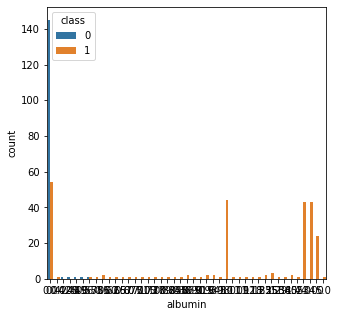

In [79]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(filledData['albumin'],hue=Data["class"])

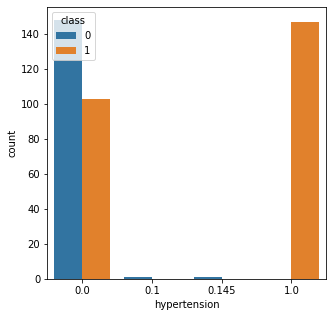

In [80]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(filledData['hypertension'],hue=Data["class"])

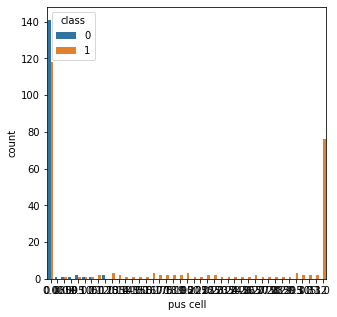

In [81]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(filledData["pus cell"],hue=Data["class"])

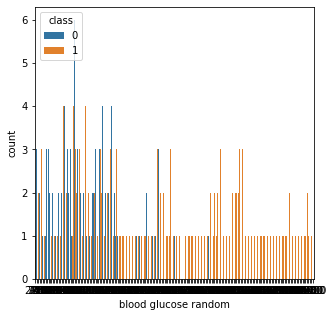

In [82]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(filledData['blood glucose random'],hue=Data["class"])

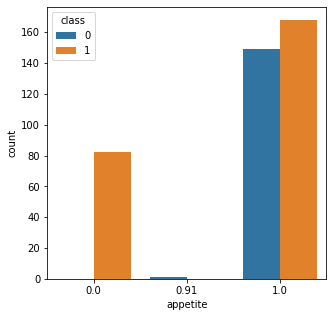

In [83]:
fig=plt.subplots(1,1,figsize=(5,5))
sns.countplot(filledData['appetite'],hue=Data["class"])

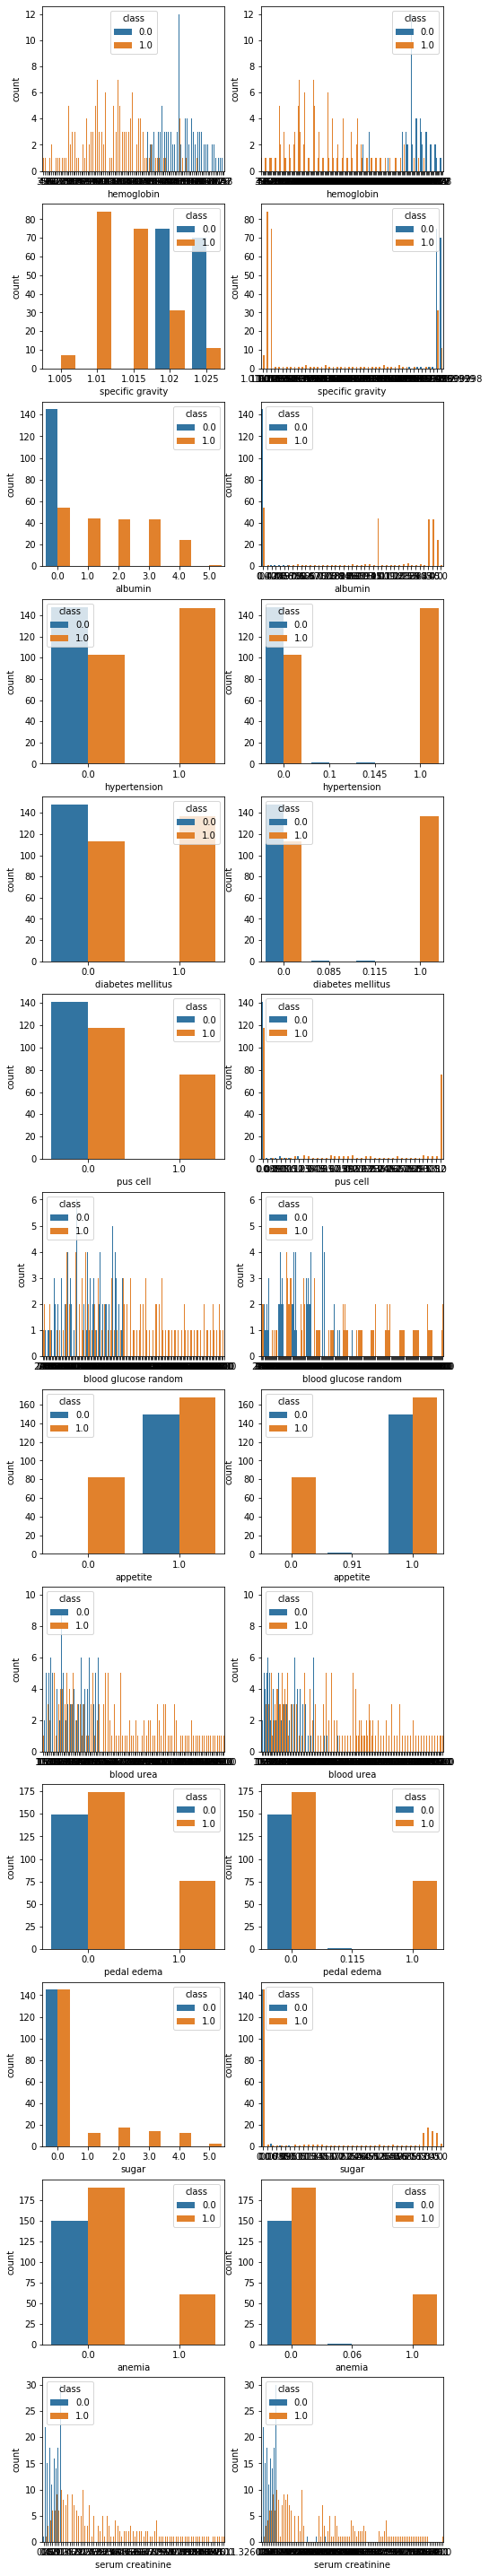

In [84]:
cols=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
        "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]
#make the subplot size
n_cols=2
n_rows=13
fig, axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*4,n_rows*4))
for c in range (len(cols)):
    ax = axs[c][0]
    sns.countplot(Data[cols[c]],hue=subdata["class"],ax=ax)
    
    
    ax = axs[c][1]
    sns.countplot(filledData[cols[c]],hue=subData["class"],ax=ax)
    


In [85]:
highCo=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]

In [86]:
Data[p+["class"]].describe() 

,specific gravity,hemoglobin,albumin,hypertension,blood glucose random,diabetes mellitus,serum creatinine,class
count,353.000000,348.000000,354.000000,398.000000,356.000000,398.000000,383.000000,400.000000
mean,1.017408,12.526437,1.016949,0.369347,148.036517,0.344221,3.072454,0.625000
std,0.005717,2.912587,1.352679,0.483235,79.281714,0.475712,5.741126,0.484729
min,1.005000,3.100000,0.000000,0.000000,22.000000,0.000000,0.400000,0.000000
25%,1.010000,10.300000,0.000000,0.000000,99.000000,0.000000,0.900000,0.000000
50%,1.020000,12.650000,0.000000,0.000000,121.000000,0.000000,1.300000,1.000000
75%,1.020000,15.000000,2.000000,1.000000,163.000000,1.000000,2.800000,1.000000
max,1.025000,17.800000,5.000000,1.000000,490.000000,1.000000,76.000000,1.000000


In [87]:
filledData[highCo].describe() 

,hemoglobin,specific gravity,albumin,hypertension,diabetes mellitus,pus cell,blood glucose random,appetite,blood urea,pedal edema,sugar,anemia,serum creatinine
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,12.609504,1.017463,1.002975,0.368113,0.343000,0.221937,147.830363,0.794775,57.298679,0.190288,0.430638,0.150150,3.059399
std,2.739532,0.005385,1.276710,0.482341,0.474832,0.385012,74.896233,0.404118,49.305994,0.392695,1.034024,0.357468,5.619711
min,3.100000,1.005000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.400000
25%,10.875000,1.015000,0.000000,0.000000,0.000000,0.000000,101.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.900000
50%,12.990000,1.018787,0.422500,0.000000,0.000000,0.000000,126.000000,1.000000,44.000000,0.000000,0.000000,0.000000,1.400000
75%,14.625000,1.020000,2.000000,1.000000,1.000000,0.225000,158.936250,1.000000,64.078250,0.000000,0.096250,0.000000,2.825000
max,17.800000,1.025000,5.000000,1.000000,1.000000,1.000000,490.000000,1.000000,391.000000,1.000000,5.000000,1.000000,76.000000


In [88]:
(filledData[highCo].describe() - Data[highCo].describe() )/filledData[highCo].describe()

,hemoglobin,specific gravity,albumin,hypertension,diabetes mellitus,pus cell,blood glucose random,appetite,blood urea,pedal edema,sugar,anemia,serum creatinine
count,0.130000,0.117500,0.115000,0.005000,0.005000,0.162500,0.110000,0.002500,0.047500,0.002500,0.122500,0.002500,0.042500
mean,0.006588,0.000054,-0.013933,-0.003353,-0.003560,-0.022205,-0.001395,0.000363,-0.002217,-0.000992,-0.045293,-0.001505,-0.004267
std,-0.063169,-0.061539,-0.059504,-0.001855,-0.001852,-0.089398,-0.058554,-0.001153,-0.024277,-0.001209,-0.063023,-0.001175,-0.021605
min,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,0.052874,0.004926,NaN,NaN,NaN,NaN,0.019802,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,0.026174,-0.001190,1.000000,NaN,NaN,NaN,0.039683,0.000000,0.045455,NaN,NaN,NaN,0.071429
75%,-0.025641,0.000000,0.000000,0.000000,0.000000,1.000000,-0.025568,0.000000,-0.029991,NaN,1.000000,NaN,0.008850
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
#nural network
from sklearn.neural_network import MLPClassifier
p=[]
c=[0]
t=['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 
   'pus cell clumps', 'bacteria', 'age', 'blood pressure', 'serum creatinine', 'blood urea', 'blood glucose random', 
   'albumin', 'specific gravity', 'sugar', 'hemoglobin', 'pus cell', 'sodium', 'potassium', 
   'red blood cell count', 'red blood cells','white blood cell count']   #,'packed cell volume'

t=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]
Max_test=0
for i in t:
    p+=[i]


    subdata = Data.loc[:,p+["class"]]
    subData=subdata.dropna(subset=p)

    X=subData.loc[:,p]
    Y=subData.loc[:,["class"]]
    print("\n============================================================================================")
    print("Only considering",p,"\nsize =",len(subData))
    print("============================================================================================\n\n")


    CNN = MLPClassifier(hidden_layer_sizes=(len(p),400,300,100,80,60,40,20,10), max_iter=250, activation='relu',solver='lbfgs',
                        verbose=30,  random_state=8,tol=0.001,alpha=0.001)

    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
    Y_train = np.array(np.ravel(Y_train)).astype(int)

    CNN.fit(X_train, Y_train)
    print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")

    

    from sklearn.metrics import confusion_matrix

    cm= confusion_matrix(Y_test,CNN.predict(X_test))

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()

    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    
    if (c[-1]>test_score):p.pop(-1)
    
    c+=[test_score]
    
    #print(CNN.predict_log_proba)
    



Only considering ['hemoglobin'] 
size = 348


MLPClassifier Training Accuracy: 0.8847736625514403 

MLPClassifier  Testing Accuracy =  0.9142857142857143 

	TP: 59 	FP: 7 
	TN: 37 	FN: 2




Only considering ['hemoglobin', 'specific gravity'] 
size = 313


MLPClassifier Training Accuracy: 0.8493150684931506 

MLPClassifier  Testing Accuracy =  0.7553191489361702 

	TP: 31 	FP: 0 
	TN: 40 	FN: 23




Only considering ['hemoglobin', 'albumin'] 
size = 313


MLPClassifier Training Accuracy: 0.9406392694063926 

MLPClassifier  Testing Accuracy =  0.925531914893617 

	TP: 47 	FP: 0 
	TN: 40 	FN: 7




Only considering ['hemoglobin', 'albumin', 'hypertension'] 
size = 311


MLPClassifier Training Accuracy: 0.9539170506912442 

MLPClassifier  Testing Accuracy =  0.9893617021276596 

	TP: 56 	FP: 0 
	TN: 37 	FN: 1




Only considering ['hemoglobin', 'albumin', 'hypertension', 'diabetes mellitus'] 
size = 311


MLPClassifier Training Accuracy: 0.8709677419354839 

MLPClassifier  Testing Accura

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier Training Accuracy: 0.8704663212435233 

MLPClassifier  Testing Accuracy =  0.8313253012048193 

	TP: 32 	FP: 0 
	TN: 37 	FN: 14




Only considering ['hemoglobin', 'albumin', 'hypertension', 'blood glucose random', 'blood urea', 'pedal edema'] 
size = 275


MLPClassifier Training Accuracy: 0.9114583333333334 

MLPClassifier  Testing Accuracy =  0.8192771084337349 

	TP: 33 	FP: 2 
	TN: 35 	FN: 13




Only considering ['hemoglobin', 'albumin', 'hypertension', 'blood glucose random', 'blood urea', 'sugar'] 
size = 275


MLPClassifier Training Accuracy: 0.8645833333333334 

MLPClassifier  Testing Accuracy =  0.8192771084337349 

	TP: 31 	FP: 0 
	TN: 37 	FN: 15




Only considering ['hemoglobin', 'albumin', 'hypertension', 'blood glucose random', 'blood urea', 'sugar', 'anemia'] 
size = 274




C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier Training Accuracy: 0.9319371727748691 

MLPClassifier  Testing Accuracy =  0.8795180722891566 

	TP: 39 	FP: 0 
	TN: 34 	FN: 10




Only considering ['hemoglobin', 'albumin', 'hypertension', 'blood glucose random', 'blood urea', 'sugar', 'anemia', 'serum creatinine'] 
size = 273


MLPClassifier Training Accuracy: 0.9790575916230366 

MLPClassifier  Testing Accuracy =  0.9512195121951219 

	TP: 43 	FP: 0 
	TN: 35 	FN: 4





In [90]:
for i in range (len(c)):
    print(i,c[i])
print(max(c))

0 0
1 0.9142857142857143
2 0.7553191489361702
3 0.925531914893617
4 0.9893617021276596
5 0.851063829787234
6 0.651685393258427
7 0.9047619047619048
8 0.7619047619047619
9 0.8313253012048193
10 0.8192771084337349
11 0.8192771084337349
12 0.8795180722891566
13 0.9512195121951219
0.9893617021276596


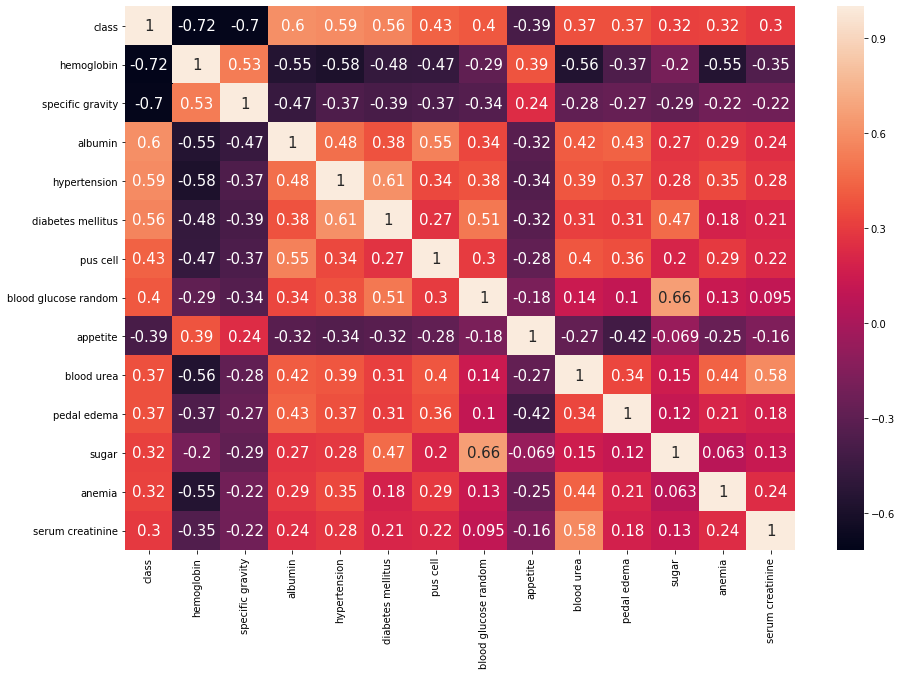

In [91]:
from pandas import DataFrame
import seaborn as sn
highCo=["class","hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]
df = DataFrame(filledData,columns=highCo)
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 15},ax=ax)

In [134]:
# Training model

def models(X_train,Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0,solver='lbfgs')
    log.fit(X_train,Y_train)
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",gamma='auto',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier( criterion="entropy" ,random_state=0)
    tree.fit(X_train,Y_train)
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    
    #Use XGBClassifier
    import xgboost as xgb
    modelx=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
    modelx.fit(X_train,Y_train)
    
    #Use ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    ExtraTree=ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=8)
    ExtraTree.fit(X_train,Y_train)
    
    #use AdaBoostClassifier
    from sklearn.ensemble import AdaBoostClassifier
    AdaBoost = AdaBoostClassifier(n_estimators=100)
    AdaBoost.fit(X_train,Y_train)
    
    #print the accuracy of each model
    print("[0] Logistic Regression Training Accuracy: ",log.score(X_train,Y_train))
    print("[1] K Neighbors Regression Training Accuracy: ",knn.score(X_train,Y_train))
    print("[2] SVC Linear Training Accuracy: ",svc_lin.score(X_train,Y_train))
    print("[3] SVC RBF Training Accuracy: ",svc_rbf.score(X_train,Y_train))
    print("[4] Gaussian NB Training Accuracy: ",gauss.score(X_train,Y_train))
    print("[5] Decision Tree Training Accuracy: ",tree.score(X_train,Y_train))
    print("[6] Random Forest Training Accuracy: ",forest.score(X_train,Y_train))
    print("[7] XGBClassifier Training Accuracy: ",modelx.score(X_train,Y_train))
    print("[8] ExtraTreesClassifier Training Accuracy: ",ExtraTree.score(X_train,Y_train))
    print("[9] AdaBoostClassifierr Training Accuracy: ",AdaBoost.score(X_train,Y_train))
    
    
    return  log,knn, svc_lin, svc_rbf, gauss, tree, forest,modelx,ExtraTree,AdaBoost

In [157]:
highCo=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]





p=[ "hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus", "pus cell","serum creatinine"]
#p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]
#p=highCo
print(len(Data))
 
subdata = filledData.loc[:,p+["class"]]   
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["class"]]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    

400

Only considering ['hemoglobin', 'specific gravity', 'albumin', 'hypertension', 'diabetes mellitus', 'pus cell', 'serum creatinine'] 
size = 400         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9678571428571429
[1] K Neighbors Regression Training Accuracy:  0.9571428571428572
[2] SVC Linear Training Accuracy:  0.9607142857142857
[3] SVC RBF Training Accuracy:  0.9642857142857143
[4] Gaussian NB Training Accuracy:  0.95
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9928571428571429
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9833333333333333 

	TP: 80 	FP: 0 
	TN: 38 	FN: 2



K Neighbors Testing Accuracy =  0.9833333333333333 

	TP: 80 	FP: 0 
	TN: 38 	FN: 2



SVC Linear Testing Accuracy =  0.975 

	TP: 79 	FP: 0 
	TN: 38 	FN: 3



SVC RBF Testing Accuracy =  0.975 

	TP: 7

Decision Tree
                      importance
feature                         
hemoglobin                 0.580
specific gravity           0.265
albumin                    0.103
serum creatinine           0.031
blood glucose random       0.022
hypertension               0.000
diabetes mellitus          0.000


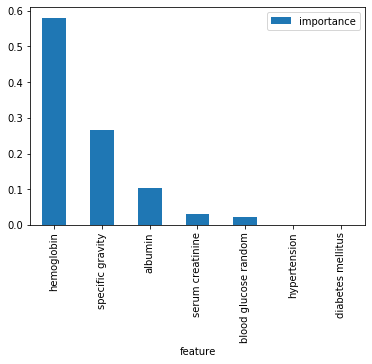

In [225]:
print("Decision Tree")
i=5
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

[Text(111.60000000000001, 199.32, 'X[1] <= 1.019\nentropy = 0.971\nsamples = 280\nvalue = [112, 168]'),
 Text(55.800000000000004, 163.07999999999998, 'entropy = 0.0\nsamples = 134\nvalue = [0, 134]'),
 Text(167.4, 163.07999999999998, 'X[2] <= 0.588\nentropy = 0.783\nsamples = 146\nvalue = [112, 34]'),
 Text(111.60000000000001, 126.83999999999999, 'X[0] <= 12.85\nentropy = 0.353\nsamples = 120\nvalue = [112, 8]'),
 Text(55.800000000000004, 90.6, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(167.4, 90.6, 'X[7] <= 1.3\nentropy = 0.127\nsamples = 114\nvalue = [112, 2]'),
 Text(111.60000000000001, 54.359999999999985, 'entropy = 0.0\nsamples = 107\nvalue = [107, 0]'),
 Text(223.20000000000002, 54.359999999999985, 'X[6] <= 121.0\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(167.4, 18.119999999999976, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 18.119999999999976, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'entro

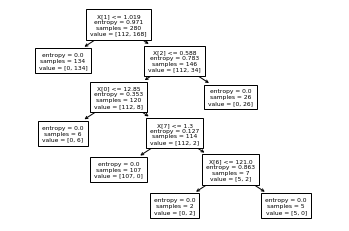

In [178]:
from sklearn import tree
tree.plot_tree(model[5], fontsize=6)

Random Forest
                      importance
feature                         
specific gravity           0.275
hemoglobin                 0.246
albumin                    0.196
serum creatinine           0.160
hypertension               0.051
blood glucose random       0.046
diabetes mellitus          0.026


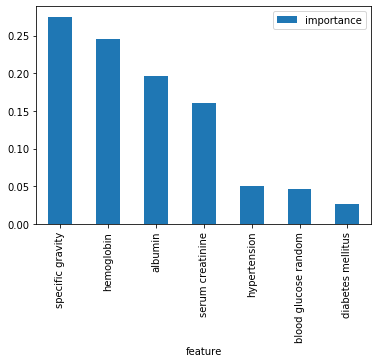

In [226]:
print("Random Forest")
i=6
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

XGB Classifier
                      importance
feature                         
serum creatinine           0.500
hemoglobin                 0.252
specific gravity           0.135
albumin                    0.089
blood glucose random       0.024
hypertension               0.000
diabetes mellitus          0.000


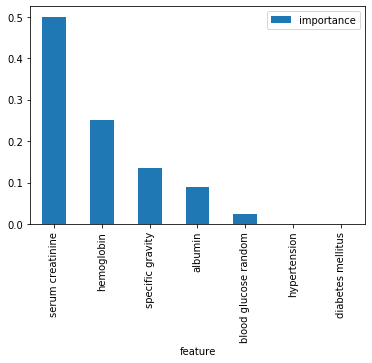

In [227]:
print("XGB Classifier")
i=7
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

ExtraTreesClassifier
                      importance
feature                         
specific gravity           0.242
hypertension               0.192
hemoglobin                 0.174
albumin                    0.158
diabetes mellitus          0.130
serum creatinine           0.057
blood glucose random       0.048


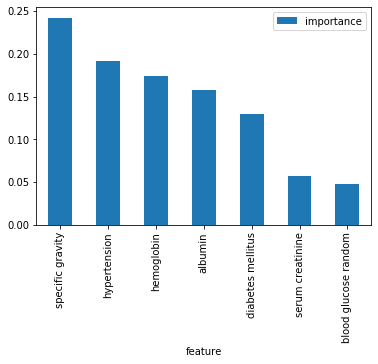

In [232]:
print("ExtraTreesClassifier")
i=8
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,3)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

AdaBoostClassifier
                      importance
feature                         
hemoglobin                  0.33
serum creatinine            0.32
specific gravity            0.14
blood glucose random        0.13
albumin                     0.08
hypertension                0.00
diabetes mellitus           0.00


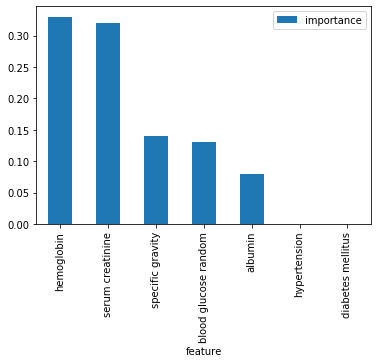

In [233]:
#weights for each feature
print("AdaBoostClassifier")
i=9
forest=model[i]
importances =pd.DataFrame({"feature":p,"importance":np.round(forest.feature_importances_,4)})
importances = importances.sort_values("importance",ascending=False).set_index("feature")

print(importances)
importances.plot.bar()

In [143]:
#nural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

highCo=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]
p=['appetite', 'pedal edema', 'anemia', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'pus cell clumps', 
   'age', 'blood pressure', 'serum creatinine', 'blood glucose random', 'sugar', 'hemoglobin'] 


p=highCo


subdata = filledData.loc[:,p+["class"]]
c=[]
d=[]

X=subdata.loc[:,p]
Y=subdata.loc[:,["class"]]
print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subdata))
print("============================================================================================\n\n")

for i in range (50):
    CNN = MLPClassifier(hidden_layer_sizes=(400,300,100,80,60,40,20,10), max_iter=1500,
                        activation='relu',solver='lbfgs',
                        verbose=True,  random_state=i,tol=0.01,alpha=0.003)


    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
    Y_train = np.array(np.ravel(Y_train)).astype(int)

    CNN.fit(X_train, Y_train)
    print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



    from sklearn.metrics import confusion_matrix

    cm= confusion_matrix(Y_test,CNN.predict(X_test))

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()

    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)

    
    c+=[test_score]
    d+=[CNN.score(X_train, Y_train)]

    #print(CNN.predict_log_proba)
for i in c:
    print(c)


Only considering ['hemoglobin', 'specific gravity', 'albumin', 'hypertension', 'diabetes mellitus', 'pus cell', 'blood glucose random', 'appetite', 'blood urea', 'pedal edema', 'sugar', 'anemia', 'serum creatinine'] 
size = 400


MLPClassifier Training Accuracy: 0.975 

MLPClassifier  Testing Accuracy =  0.975 

	TP: 52 	FP: 0 
	TN: 26 	FN: 2



MLPClassifier Training Accuracy: 0.98125 

MLPClassifier  Testing Accuracy =  0.975 

	TP: 52 	FP: 0 
	TN: 26 	FN: 2



MLPClassifier Training Accuracy: 0.91875 

MLPClassifier  Testing Accuracy =  0.95 

	TP: 52 	FP: 2 
	TN: 24 	FN: 2



MLPClassifier Training Accuracy: 0.971875 

MLPClassifier  Testing Accuracy =  0.975 

	TP: 52 	FP: 0 
	TN: 26 	FN: 2



MLPClassifier Training Accuracy: 0.978125 

MLPClassifier  Testing Accuracy =  0.975 

	TP: 52 	FP: 0 
	TN: 26 	FN: 2



MLPClassifier Training Accuracy: 0.965625 

MLPClassifier  Testing Accuracy =  0.975 

	TP: 52 	FP: 0 
	TN: 26 	FN: 2



MLPClassifier Training Accuracy: 0.971875 

MLPCl

In [98]:
for i in range (len(c)):
    print(i,c[i])
    
print(max(c))

0 0.975
1 0.975
2 0.95
3 0.975
4 0.975
5 0.975
6 0.975
7 0.9375
8 0.95
9 0.95
10 0.925
11 0.95
12 0.975
13 0.95
14 0.975
15 0.9625
16 0.975
17 0.9625
18 0.7
19 0.975
20 1.0
21 0.975
22 0.9625
23 0.975
24 0.9375
25 0.975
26 0.975
27 0.975
28 0.8625
29 0.975
30 0.975
31 0.975
32 0.975
33 0.9625
34 0.975
35 0.975
36 0.95
37 0.9625
38 0.975
39 0.925
40 0.975
41 0.95
42 0.975
43 0.7875
44 0.975
45 0.9625
46 0.9375
47 0.975
48 0.975
49 0.9375
1.0


In [99]:
for i in range (len(d)):
    print(i,d[i])
    
print(max(d))

0 0.975
1 0.98125
2 0.91875
3 0.971875
4 0.978125
5 0.965625
6 0.971875
7 0.921875
8 0.98125
9 0.98125
10 0.88125
11 0.990625
12 0.98125
13 0.93125
14 0.978125
15 0.971875
16 0.928125
17 0.91875
18 0.6125
19 0.9875
20 0.928125
21 0.940625
22 0.965625
23 0.978125
24 0.9375
25 0.975
26 0.975
27 0.984375
28 0.8625
29 0.975
30 0.971875
31 0.978125
32 0.9875
33 0.921875
34 0.975
35 0.975
36 0.990625
37 0.915625
38 0.925
39 0.890625
40 0.971875
41 0.946875
42 0.96875
43 0.778125
44 0.984375
45 0.990625
46 0.8875
47 0.953125
48 0.96875
49 0.9875
0.990625


In [100]:
b=[]
for i in range (len(c)):
    if(c[i]<d[i]):
        b+=[c[i]+d[i]]
        print(i,b[-1])
print(max(b))

1 1.9562499999999998
4 1.953125
8 1.93125
9 1.93125
11 1.9406249999999998
12 1.9562499999999998
14 1.953125
15 1.9343750000000002
19 1.9625
22 1.928125
23 1.953125
27 1.959375
31 1.953125
32 1.9625
36 1.9406249999999998
44 1.959375
45 1.953125
49 1.925
1.9625


In [101]:
#nural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

p=p=[ "hemoglobin", "specific gravity", "albumin", "hypertension",
     "diabetes mellitus", "blood glucose random"]


subdata = filledData.loc[:,p+["class"]]
c=[]
d=[]

X=subdata.loc[:,p]
Y=subdata.loc[:,["class"]]
print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subdata))
print("============================================================================================\n\n")

for i in range (50):
    CNN = MLPClassifier(hidden_layer_sizes=(400,300,100,80,60,40,20,10), max_iter=1500,
                        activation='relu',solver='lbfgs',
                        verbose=True,  random_state=0,tol=0.01,alpha=0.003)


    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    Y_train = np.array(np.ravel(Y_train)).astype(int)

    CNN.fit(X_train, Y_train)
    print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



    from sklearn.metrics import confusion_matrix

    cm= confusion_matrix(Y_test,CNN.predict(X_test))

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()

    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)

    
    c+=[test_score]
    d+=[CNN.score(X_train, Y_train)]

    #print(CNN.predict_log_proba)
for i in c:
    print(c)


Only considering ['hemoglobin', 'specific gravity', 'albumin', 'hypertension', 'diabetes mellitus', 'blood glucose random'] 
size = 400


MLPClassifier Training Accuracy: 0.75 

MLPClassifier  Testing Accuracy =  0.725 

	TP: 48 	FP: 18 
	TN: 10 	FN: 4



MLPClassifier Training Accuracy: 0.965625 

MLPClassifier  Testing Accuracy =  0.9375 

	TP: 42 	FP: 0 
	TN: 33 	FN: 5



MLPClassifier Training Accuracy: 0.95625 

MLPClassifier  Testing Accuracy =  0.95 

	TP: 51 	FP: 1 
	TN: 25 	FN: 3



MLPClassifier Training Accuracy: 0.9 

MLPClassifier  Testing Accuracy =  0.8625 

	TP: 45 	FP: 3 
	TN: 24 	FN: 8



MLPClassifier Training Accuracy: 0.8375 

MLPClassifier  Testing Accuracy =  0.85 

	TP: 44 	FP: 4 
	TN: 24 	FN: 8



MLPClassifier Training Accuracy: 0.928125 

MLPClassifier  Testing Accuracy =  0.975 

	TP: 43 	FP: 1 
	TN: 35 	FN: 1



MLPClassifier Training Accuracy: 0.9125 

MLPClassifier  Testing Accuracy =  0.8625 

	TP: 47 	FP: 3 
	TN: 22 	FN: 8



MLPClassifier Training Acc

In [102]:
for i in range (len(c)):
    print(i,c[i])
    
print(max(c))

0 0.725
1 0.9375
2 0.95
3 0.8625
4 0.85
5 0.975
6 0.8625
7 0.95
8 0.9125
9 0.825
10 0.9375
11 0.975
12 0.9375
13 0.9375
14 0.9125
15 0.8375
16 0.9
17 0.975
18 0.9375
19 0.9
20 0.85
21 0.875
22 0.9375
23 0.9
24 0.95
25 0.8
26 0.875
27 0.95
28 0.9625
29 0.8375
30 0.9
31 0.95
32 0.9625
33 0.875
34 0.975
35 0.875
36 1.0
37 0.8125
38 0.9375
39 0.9625
40 0.825
41 0.975
42 0.825
43 0.975
44 0.9125
45 0.95
46 0.925
47 0.9125
48 0.8625
49 0.9625
1.0


In [103]:
b=[]
for i in range (len(c)):
    if(c[i]<d[i]):
        b+=[c[i]+d[i]]
        print(i,b[-1])
print(max(b))

0 1.475
1 1.903125
2 1.90625
3 1.7625000000000002
6 1.775
7 1.903125
9 1.671875
10 1.90625
12 1.890625
13 1.90625
14 1.8781249999999998
15 1.70625
16 1.865625
18 1.890625
20 1.7125
22 1.896875
23 1.83125
24 1.903125
25 1.6218750000000002
26 1.809375
29 1.71875
30 1.8250000000000002
31 1.903125
32 1.9343750000000002
35 1.765625
37 1.74375
38 1.896875
42 1.665625
45 1.903125
47 1.88125
1.9343750000000002


In [238]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

highCo=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]
p=[ "hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus","blood glucose random",'serum creatinine']



subdata = filledData.loc[:,p+["class"]]
c=[]
d=[]

X=subdata.loc[:,p]
Y=subdata.loc[:,["class"]]
print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subdata))
print("============================================================================================\n\n")


CNN = MLPClassifier(hidden_layer_sizes=(100,80,60,40,20,10), max_iter=1500,
                    activation='relu',solver='lbfgs',
                    verbose=True,  random_state=49,tol=0.001,alpha=0.003)


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
Y_train = np.array(np.ravel(Y_train)).astype(int)

CNN.fit(X_train, Y_train)
print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test,CNN.predict(X_test))

#Extract  TN, FP ,FN, TP
TN, FP ,FN, TP =  cm.ravel()

test_score=(TP+TN)/(TN+ FP +FN+ TP)
#print(cm)
print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
pres=TP/(TP+FP)
print("Precision=",pres)
rec=TP/(TP+FN)
print("Recall=",rec)
f1=pres*rec*2/(pres+rec)
print("F1=",f1)
print("\n"*2)


c+=[test_score]
d+=[CNN.score(X_train, Y_train)]



Only considering ['hemoglobin', 'specific gravity', 'albumin', 'hypertension', 'diabetes mellitus', 'blood glucose random', 'serum creatinine'] 
size = 400


MLPClassifier Training Accuracy: 0.978125 

MLPClassifier  Testing Accuracy =  0.975 

	TP: 52 	FP: 2 
	TN: 26 	FN: 0
Precision= 0.9629629629629629
Recall= 1.0
F1= 0.9811320754716981





In [105]:
from scipy.stats import kstest 
import random 
  
# N = int(input("Enter number of random numbers: ")) 
N = 5
  

for c in (filledData.columns):
    print("=======================\n",c,"\n=======================")
    x = kstest(filledData[c], "uniform")    
    print("Filled uniform",x)
    
    subData=Data.dropna(subset=[c])
    p=subData[c]
    x = kstest(p, "uniform") 
    print("Raw uniform",x)
    
    x = kstest(filledData[c], "norm")    
    print("Filled norm",x)
    
    subData=Data.dropna(subset=[c])
    p=subData[c]
    x = kstest(p, "norm") 
    print("Raw norm",x)
    print()


 age 
Filled uniform KstestResult(statistic=1.0, pvalue=0.0)
Raw uniform KstestResult(statistic=1.0, pvalue=0.0)
Filled norm KstestResult(statistic=0.99615010196837, pvalue=0.0)
Raw norm KstestResult(statistic=0.9960925572113366, pvalue=0.0)

 blood pressure 
Filled uniform KstestResult(statistic=1.0, pvalue=0.0)
Raw uniform KstestResult(statistic=1.0, pvalue=0.0)
Filled norm KstestResult(statistic=1.0, pvalue=0.0)
Raw norm KstestResult(statistic=1.0, pvalue=0.0)

 specific gravity 
Filled uniform KstestResult(statistic=1.0, pvalue=0.0)
Raw uniform KstestResult(statistic=1.0, pvalue=0.0)
Filled norm KstestResult(statistic=0.8425515750696722, pvalue=3.676e-320)
Raw norm KstestResult(statistic=0.8425515750696722, pvalue=1.3458776422941076e-282)

 albumin 
Filled uniform KstestResult(statistic=0.4975, pvalue=5.236454928711295e-92)
Raw uniform KstestResult(statistic=0.5621468926553672, pvalue=5.152560782095339e-106)
Filled norm KstestResult(statistic=0.5, pvalue=5.390131481240781e-93)
Raw 

In [106]:
filledData.corr()

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
age,1.000000,0.154907,-0.179322,0.110359,0.204584,0.135213,0.158300,0.043042,0.236366,0.194453,0.132288,-0.188557,0.396692,0.366176,0.233225,-0.159297,0.094227,0.053769,0.225999
blood pressure,0.154907,1.000000,-0.194553,0.156026,0.206941,0.181219,0.059483,0.112220,0.159095,0.188431,0.148522,-0.280214,0.273210,0.230186,0.087055,-0.177676,0.055260,0.195779,0.290828
specific gravity,-0.179322,-0.194553,1.000000,-0.467177,-0.290795,-0.369842,-0.292646,-0.222123,-0.339324,-0.284201,-0.223290,0.529981,-0.365648,-0.392270,-0.149984,0.241247,-0.267299,-0.217982,-0.698396
albumin,0.110359,0.156026,-0.467177,1.000000,0.271482,0.550165,0.401016,0.368445,0.341458,0.415706,0.244351,-0.551735,0.480599,0.378310,0.231876,-0.321726,0.434827,0.286997,0.599115
sugar,0.204584,0.206941,-0.290795,0.271482,1.000000,0.196726,0.156636,0.111333,0.663712,0.148703,0.128047,-0.200267,0.283845,0.466409,0.237579,-0.069448,0.119692,0.063234,0.320923
pus cell,0.135213,0.181219,-0.369842,0.550165,0.196726,1.000000,0.508030,0.325256,0.297486,0.395477,0.218073,-0.470495,0.343884,0.265070,0.188574,-0.282877,0.364309,0.292737,0.434514
pus cell clumps,0.158300,0.059483,-0.292646,0.401016,0.156636,0.508030,1.000000,0.274663,0.196125,0.184340,0.050024,-0.281921,0.194182,0.163872,0.187479,-0.188790,0.103384,0.175131,0.263320
bacteria,0.043042,0.112220,-0.222123,0.368445,0.111333,0.325256,0.274663,1.000000,0.086702,0.158394,0.050898,-0.206041,0.087991,0.079090,0.162004,-0.148497,0.134083,0.051663,0.185492
blood glucose random,0.236366,0.159095,-0.339324,0.341458,0.663712,0.297486,0.196125,0.086702,1.000000,0.140597,0.095312,-0.289803,0.379948,0.510534,0.217807,-0.180185,0.101470,0.131195,0.399952
blood urea,0.194453,0.188431,-0.284201,0.415706,0.148703,0.395477,0.184340,0.158394,0.140597,1.000000,0.581456,-0.562349,0.390615,0.314930,0.224690,-0.274660,0.338891,0.435978,0.373775


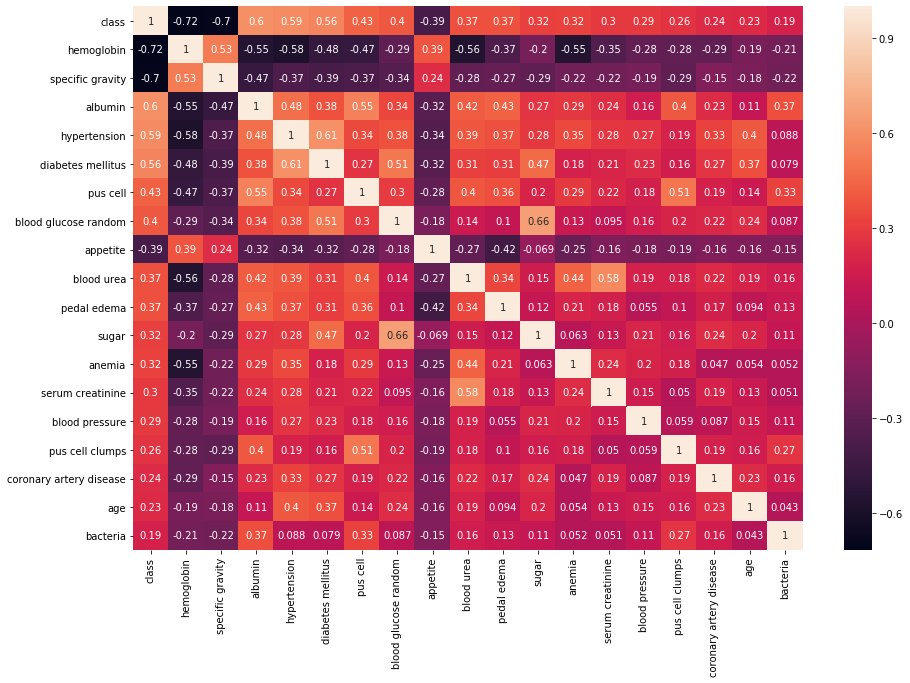

In [113]:
from pandas import DataFrame
import seaborn as sn
t=['bacteria', 'age', 'coronary artery disease', 'pus cell clumps',
       'blood pressure', 'serum creatinine', 'anemia', 'sugar', 'pedal edema',
       'blood urea', 'appetite', 'blood glucose random', 'pus cell',
       'diabetes mellitus', 'hypertension', 'albumin', 'specific gravity',
       'hemoglobin', 'class']
t=t[::-1]
df = DataFrame(filledData[t],columns=t)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

In [237]:
#==========================================================================================================================
#                                              F I N A L    B  E  S   T
#==========================================================================================================================
highCo=["hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus",
                             "pus cell", "blood glucose random", "appetite", "blood urea", "pedal edema", "sugar",
                             "anemia", "serum creatinine"]





p=[ "hemoglobin", "specific gravity", "albumin", "hypertension","diabetes mellitus","blood glucose random",'serum creatinine']
#p=[ 'specific gravity', 'hemoglobin','albumin','hypertension', 'pus cell','blood glucose random','serum creatinine'  ]
#p=highCo
print(len(Data))

NfilledData=(filledData-filledData.min())/(filledData.max()-filledData.min())

subdata = NfilledData.loc[:,p+["class"]]   
#subdata.fillna(subdata.mean(), inplace=True)
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
#X=sklearn.preprocessing.normalize(X, copy=True, return_norm=False)
Y=subData.loc[:,["class"]]





# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_T,Y_train,Y_T=train_test_split(X,Y,test_size=0.3,random_state=3)
X_CV,X_test,Y_CV,Y_test=train_test_split(X_T,Y_T,test_size=0.5,random_state=8)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    pres=TP/(TP+FP)
    print("Precision=",pres)
    rec=TP/(TP+FN)
    print("Recall=",rec)
    f1=pres*rec*2/(pres+rec)
    print("F1=",f1)
    print("\n"*2)
print("==========================================================================================")  
for i in range (len(model)):
    cm= confusion_matrix(Y_CV,model[i].predict(X_CV))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'CV Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    pres=TP/(TP+FP)
    print("Precision=",pres)
    rec=TP/(TP+FN)
    print("Recall=",rec)
    f1=pres*rec*2/(pres+rec)
    print("F1=",f1)
    print("\n"*2)
    

400

Only considering ['hemoglobin', 'specific gravity', 'albumin', 'hypertension', 'diabetes mellitus', 'blood glucose random', 'serum creatinine'] 
size = 400         Train and test set 70% : 30%


[0] Logistic Regression Training Accuracy:  0.9607142857142857
[1] K Neighbors Regression Training Accuracy:  0.9785714285714285
[2] SVC Linear Training Accuracy:  0.9714285714285714
[3] SVC RBF Training Accuracy:  0.9464285714285714
[4] Gaussian NB Training Accuracy:  0.9535714285714286
[5] Decision Tree Training Accuracy:  1.0
[6] Random Forest Training Accuracy:  1.0
[7] XGBClassifier Training Accuracy:  0.9928571428571429
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  1.0


Logistic Regression Testing Accuracy =  0.9666666666666667 

	TP: 40 	FP: 0 
	TN: 18 	FN: 2
Precision= 1.0
Recall= 0.9523809523809523
F1= 0.975609756097561



K Neighbors Testing Accuracy =  0.9833333333333333 

	TP: 41 	FP: 0 
	TN: 18 	FN: 1
Precision= 1.0
Recall= 0.976

In [217]:
NfilledData=(filledData-filledData.min())/(filledData.max()-filledData.min())
NfilledData

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,hemoglobin,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0.522727,0.230769,0.75,0.2,0.0,0.0,0.0,0.0,0.211538,0.088575,0.010582,0.836735,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,0.0,0.0,0.0,0.231517,0.042362,0.005291,0.557823,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.856838,0.132221,0.018519,0.442177,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,1.0,0.0,0.202991,0.139923,0.044974,0.551020,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.179487,0.062901,0.013228,0.578231,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.252137,0.121951,0.001323,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,0.454545,0.153846,1.00,0.0,0.0,0.0,0.0,0.0,0.113248,0.075738,0.010582,0.911565,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,0.113636,0.230769,0.75,0.0,0.0,0.0,0.0,0.0,0.166667,0.062901,0.002646,0.863946,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,0.170455,0.076923,1.00,0.0,0.0,0.0,0.0,0.0,0.196581,0.124519,0.007937,0.755102,0.0,0.0,0.0,1.0,0.0,0.0,0.0
